<div style="text-align:center;color:#888888;"><h2> IMP 5001 - Introduction to Medical Informatics </h2></div>
<div style="text-align:center;"><h1> A Tour of Machine Learning Classifiers Using Scikit-Learn </h1></div>

<div style="color:#999999;text-align:right;">Ref: <a href="https://sebastianraschka.com">Python Machine Learning 3rd Edition</a> &ensp; <a href="https://github.com/rasbt/python-machine-learning-book-3rd-edition">Code Repository</a> &ensp; <a href="https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/LICENSE.txt">MIT License</a></div>

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from IPython.display import Image
%matplotlib inline

# Loading Data

In [3]:
import os
import pandas as pd

s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)

df = pd.read_csv(s, header=None, encoding='utf-8')

df.tail()

df.to_excel("iris_data.xlsx",index=False)

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

Just in case you cannot access the data through Internet, we have already downloaded it as <i>iris.data</i> for you.

In [4]:
df = pd.read_excel('iris_data.xlsx')
df.tail()

0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder

# Label encoding with sklearn's LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df[4].values)
y

# Extract sepal length and petal length
X = df.iloc[:, [0, 2]].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<!-- An alternative way to download iris dataset from sklearn
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]] 
# The 2nd column represents the petal length
# The 3rd column represents the petal width of the flower examples.
y = iris.target # 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica

print('Class labels:', np.unique(y))
-->

## Split into training and testing sets

In [6]:
# Splitting data into 70% training and 30% test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [7]:
# numpy.bincount(x, weights=None, minlength=0): 
#   Count number of occurrences of each value in array of non-negative ints.
print('Labels count in y:', np.bincount(y))
print('Labels count in y_train:', np.bincount(y_train))
print('Labels count in y_test:', np.bincount(y_test))

Labels count in y: [50 50 50]
Labels count in y_train: [35 35 35]
Labels count in y_test: [15 15 15]


## Standardizing the features

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

StandardScaler()

## Training a perceptron via scikit-learn

### Artificial neurons

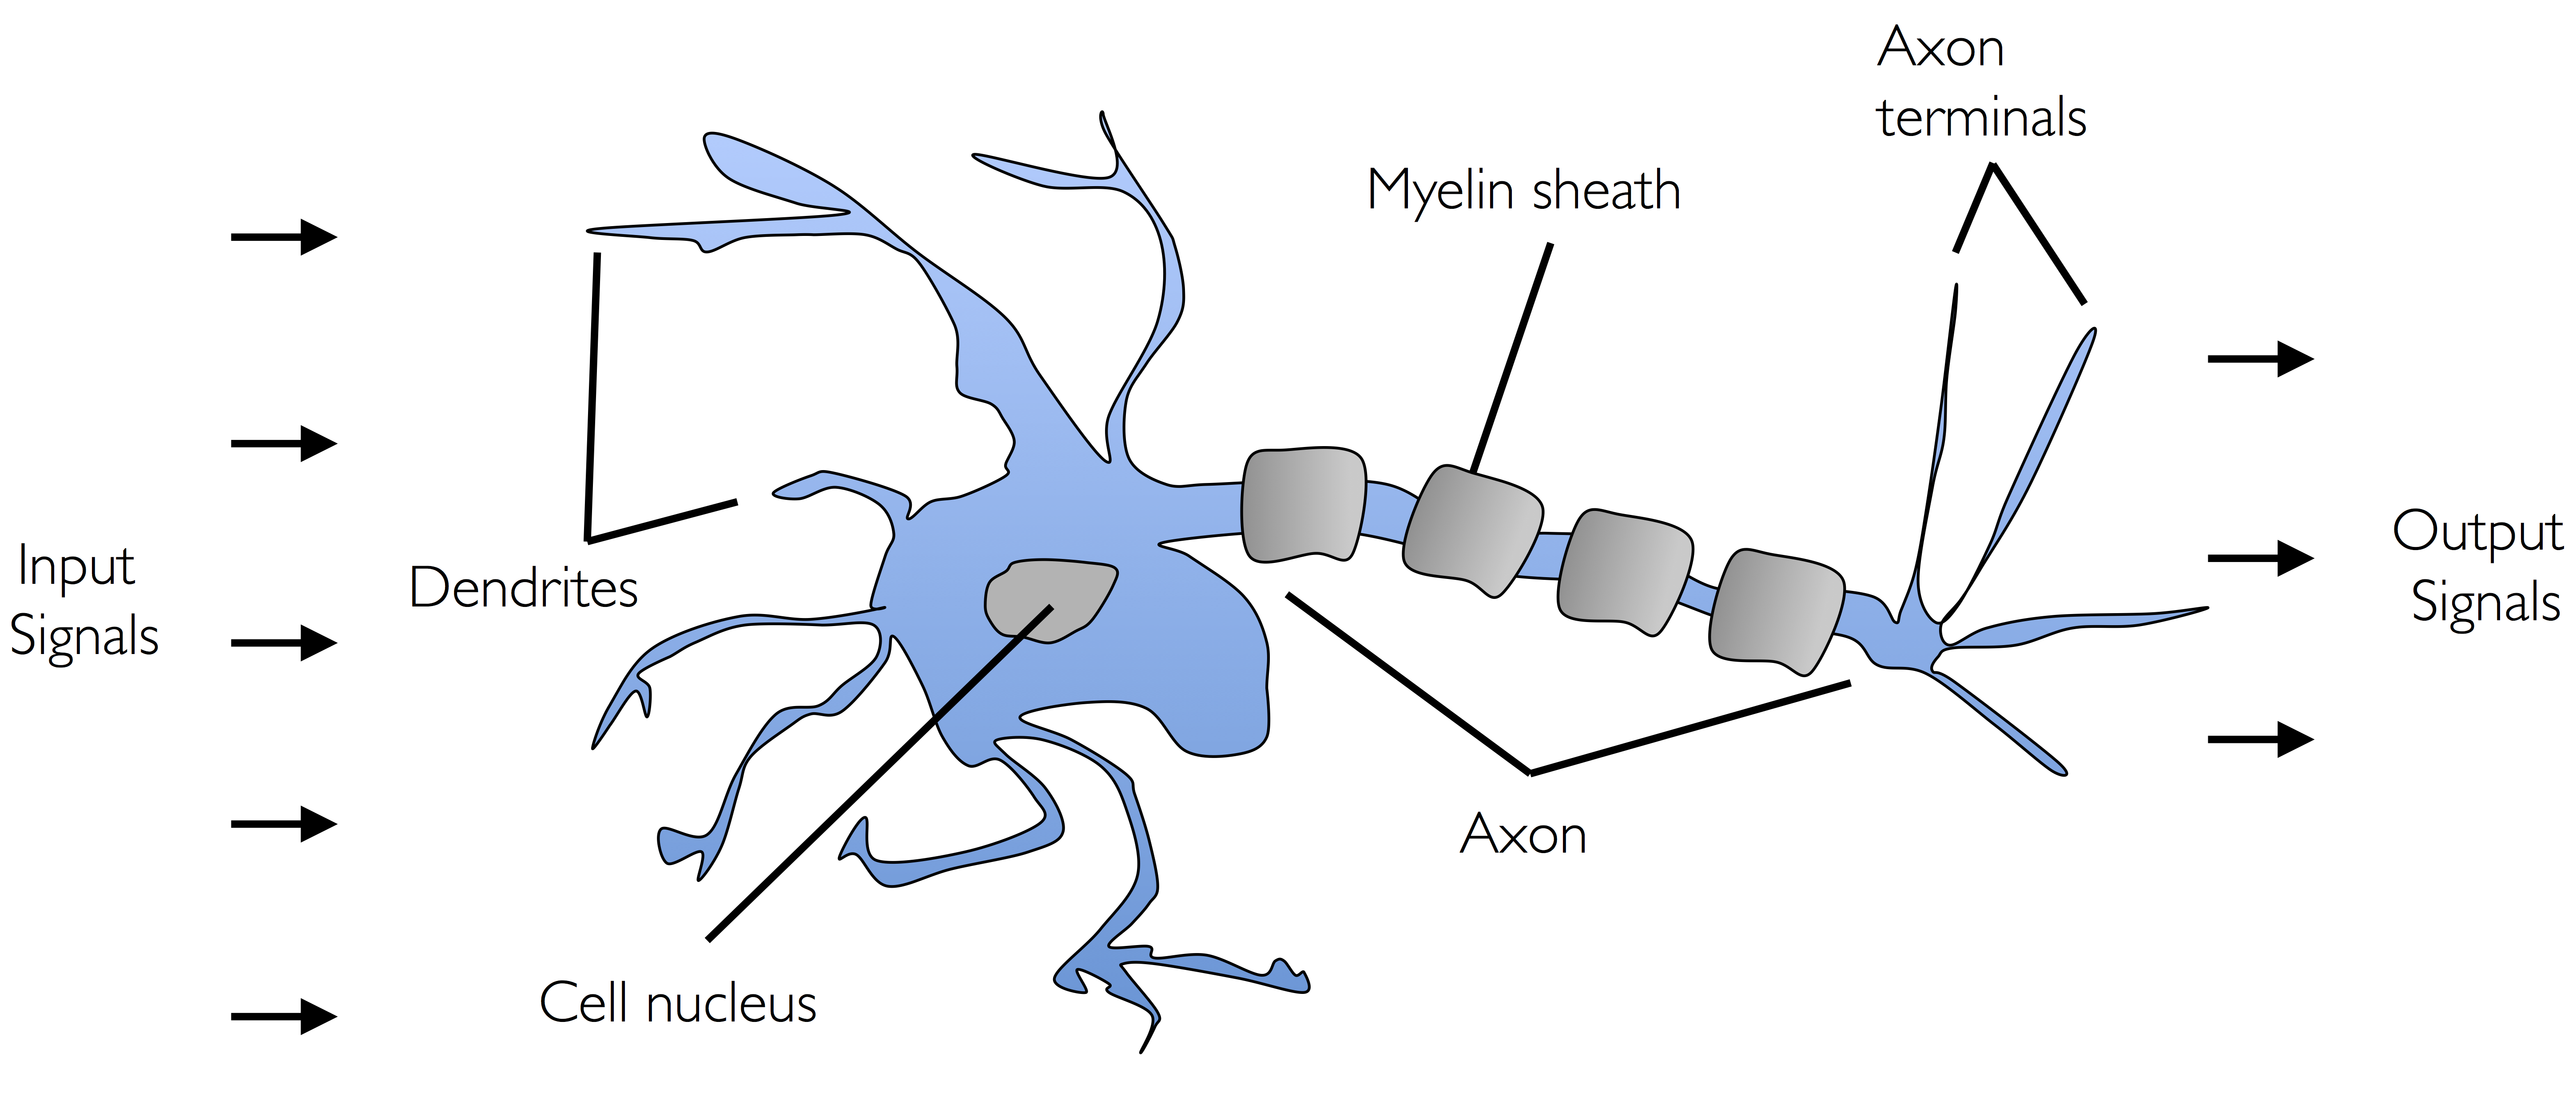

In [9]:
Image(filename='./images/02_01.png', width=500)

### The formal definition of an artificial neuron

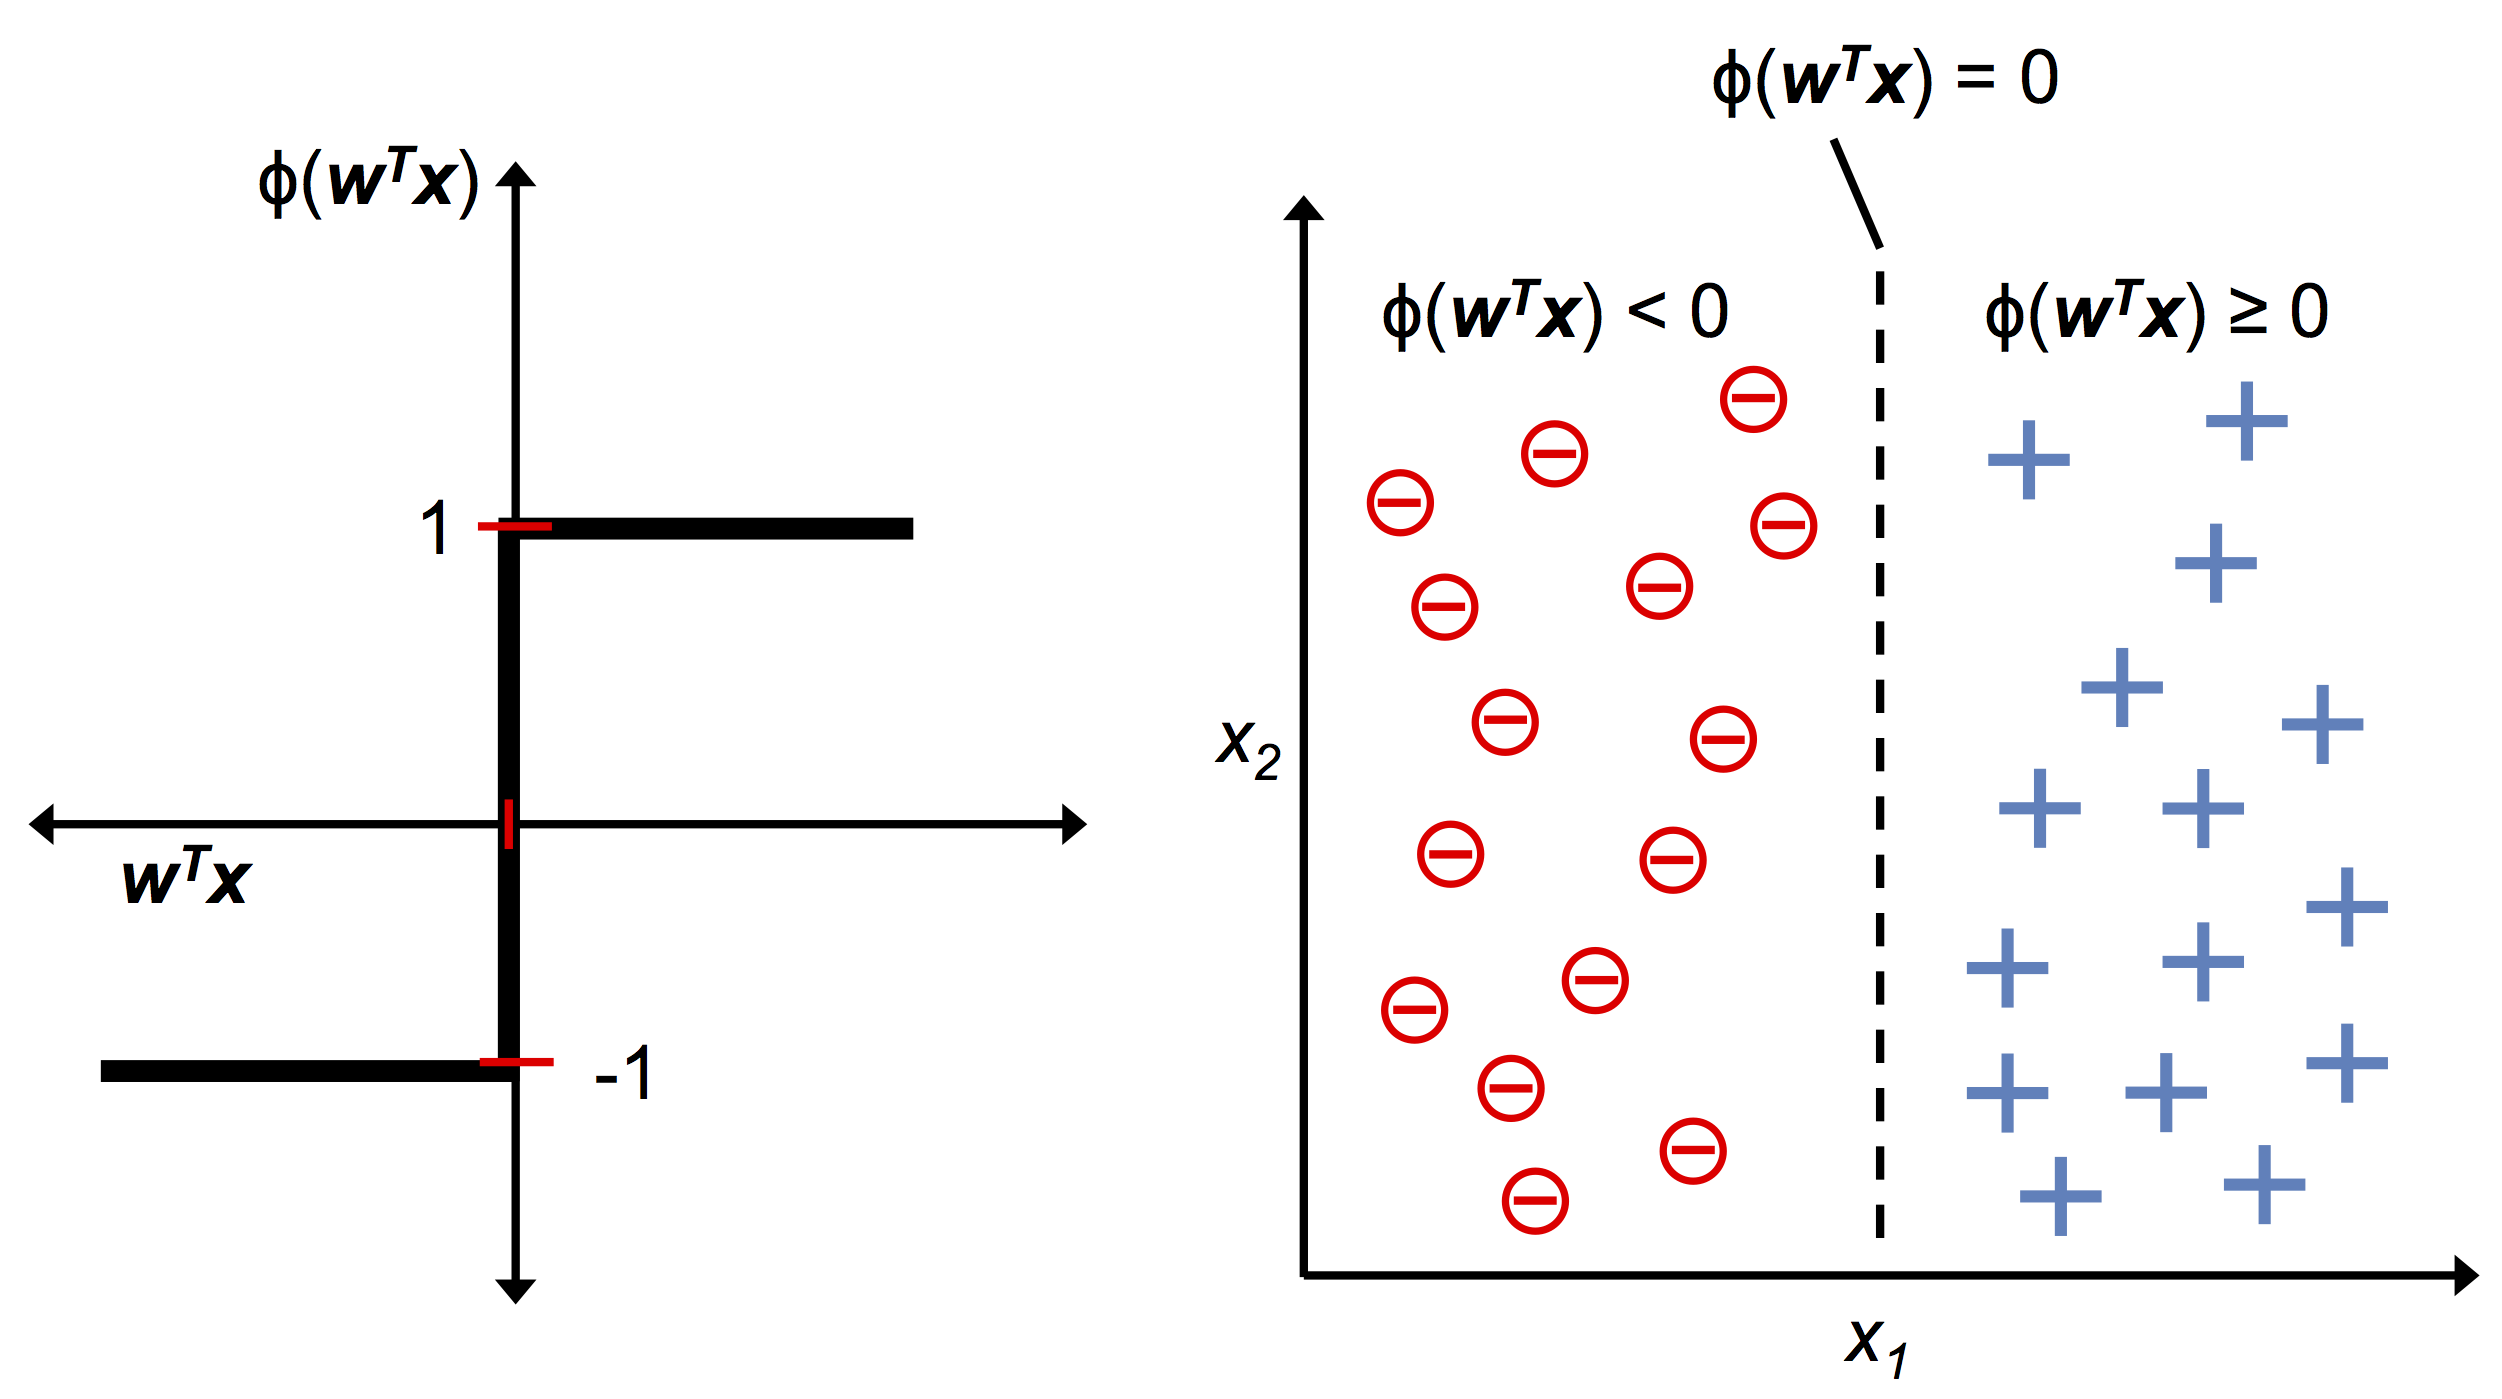

In [10]:
Image(filename='./images/02_02.png', width=500) 

### The perceptron learning rule

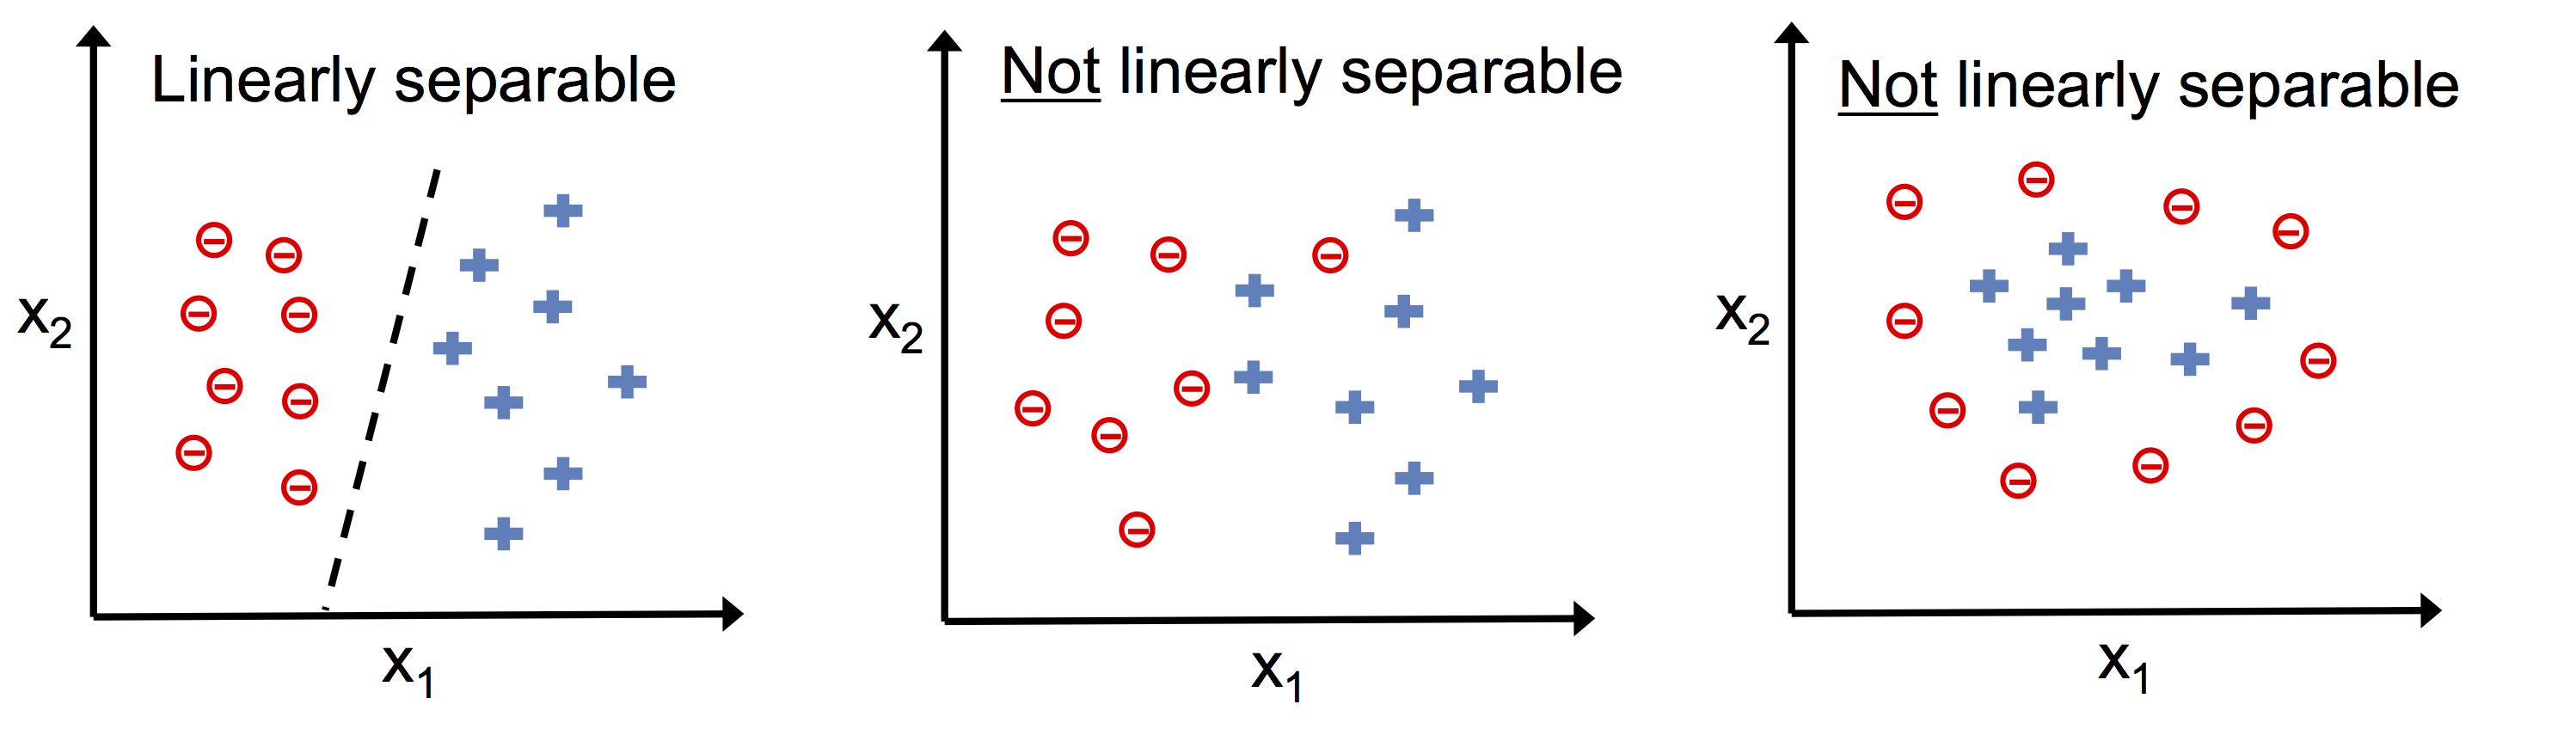

In [11]:
Image(filename='./images/02_03.png', width=600) 

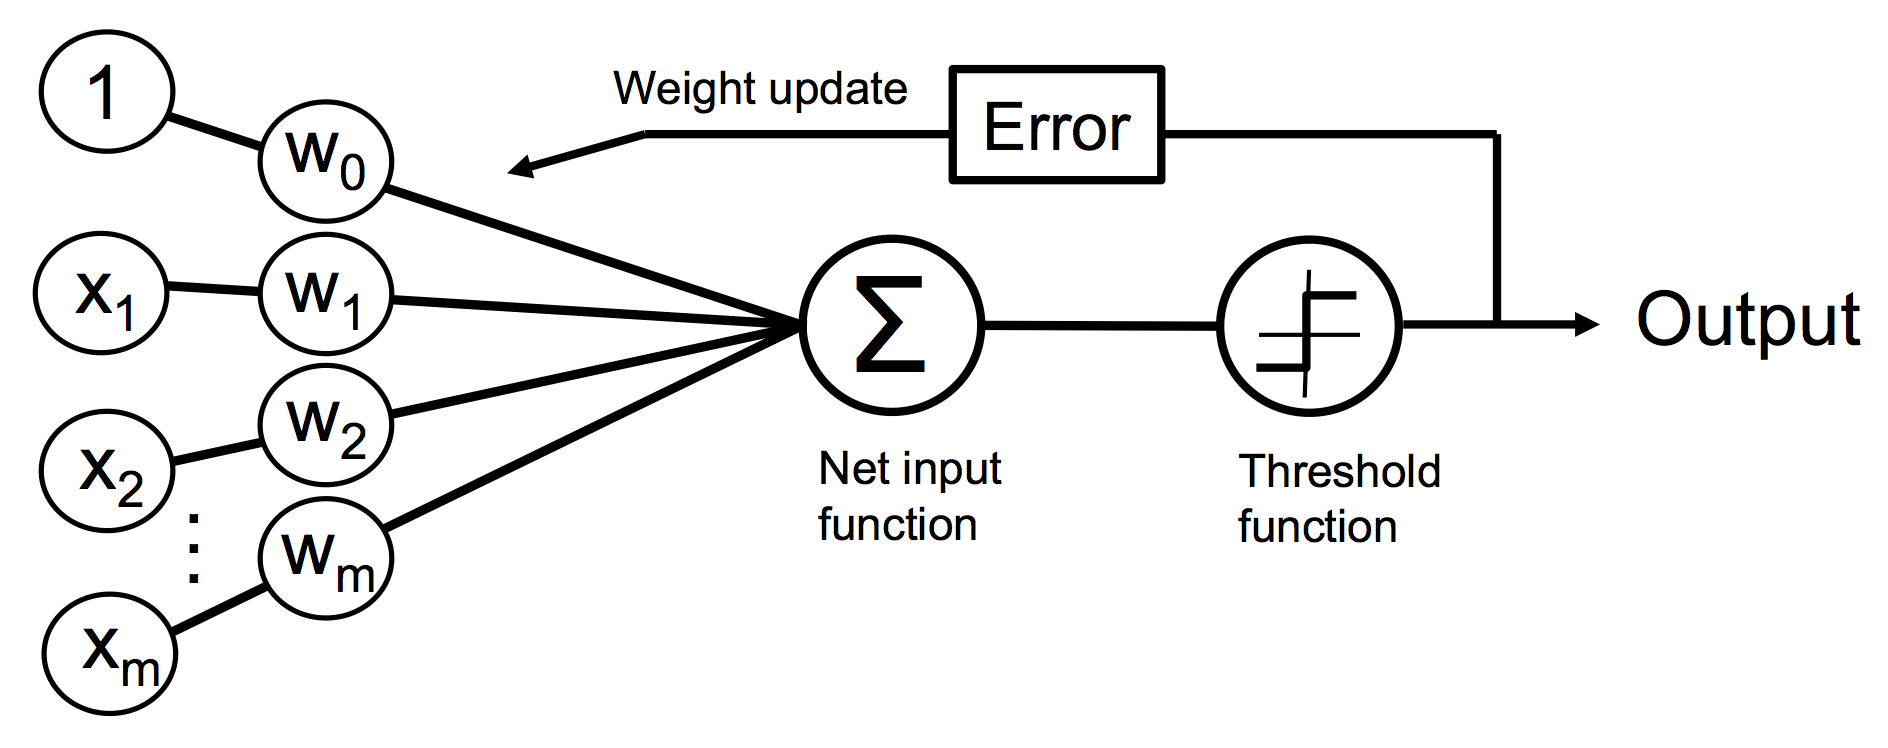

In [12]:
 Image(filename='./images/02_04.png', width=600) 

In [13]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)

In [14]:
# Training
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [15]:
# Testing
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 10


In [16]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.778


In [17]:
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

Accuracy: 0.778


## Visualize decision boundary

In [18]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # numpy.ravel(a, order='C'): Return a contiguous flattened array    
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

Training a perceptron model using the standardized training data:

Text(0.5, 0, 'petal length [standardized]')

Text(0, 0.5, 'petal width [standardized]')

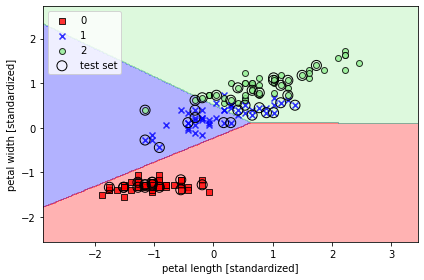

In [19]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(len(y_train), len(y_train)+len(y_test)))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()

# Modeling class probabilities via logistic regression

### Logistic regression intuition and conditional probabilities

(-0.1, 1.1)

Text(0.5, 0, 'z')

Text(0, 0.5, '$\\phi (z)$')

([<matplotlib.axis.YTick at 0x25f3a414e10>,
 <a list of 3 Text yticklabel objects>)

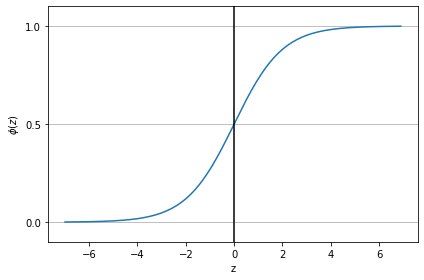

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
#plt.savefig('images/03_02.png', dpi=300)
plt.show()

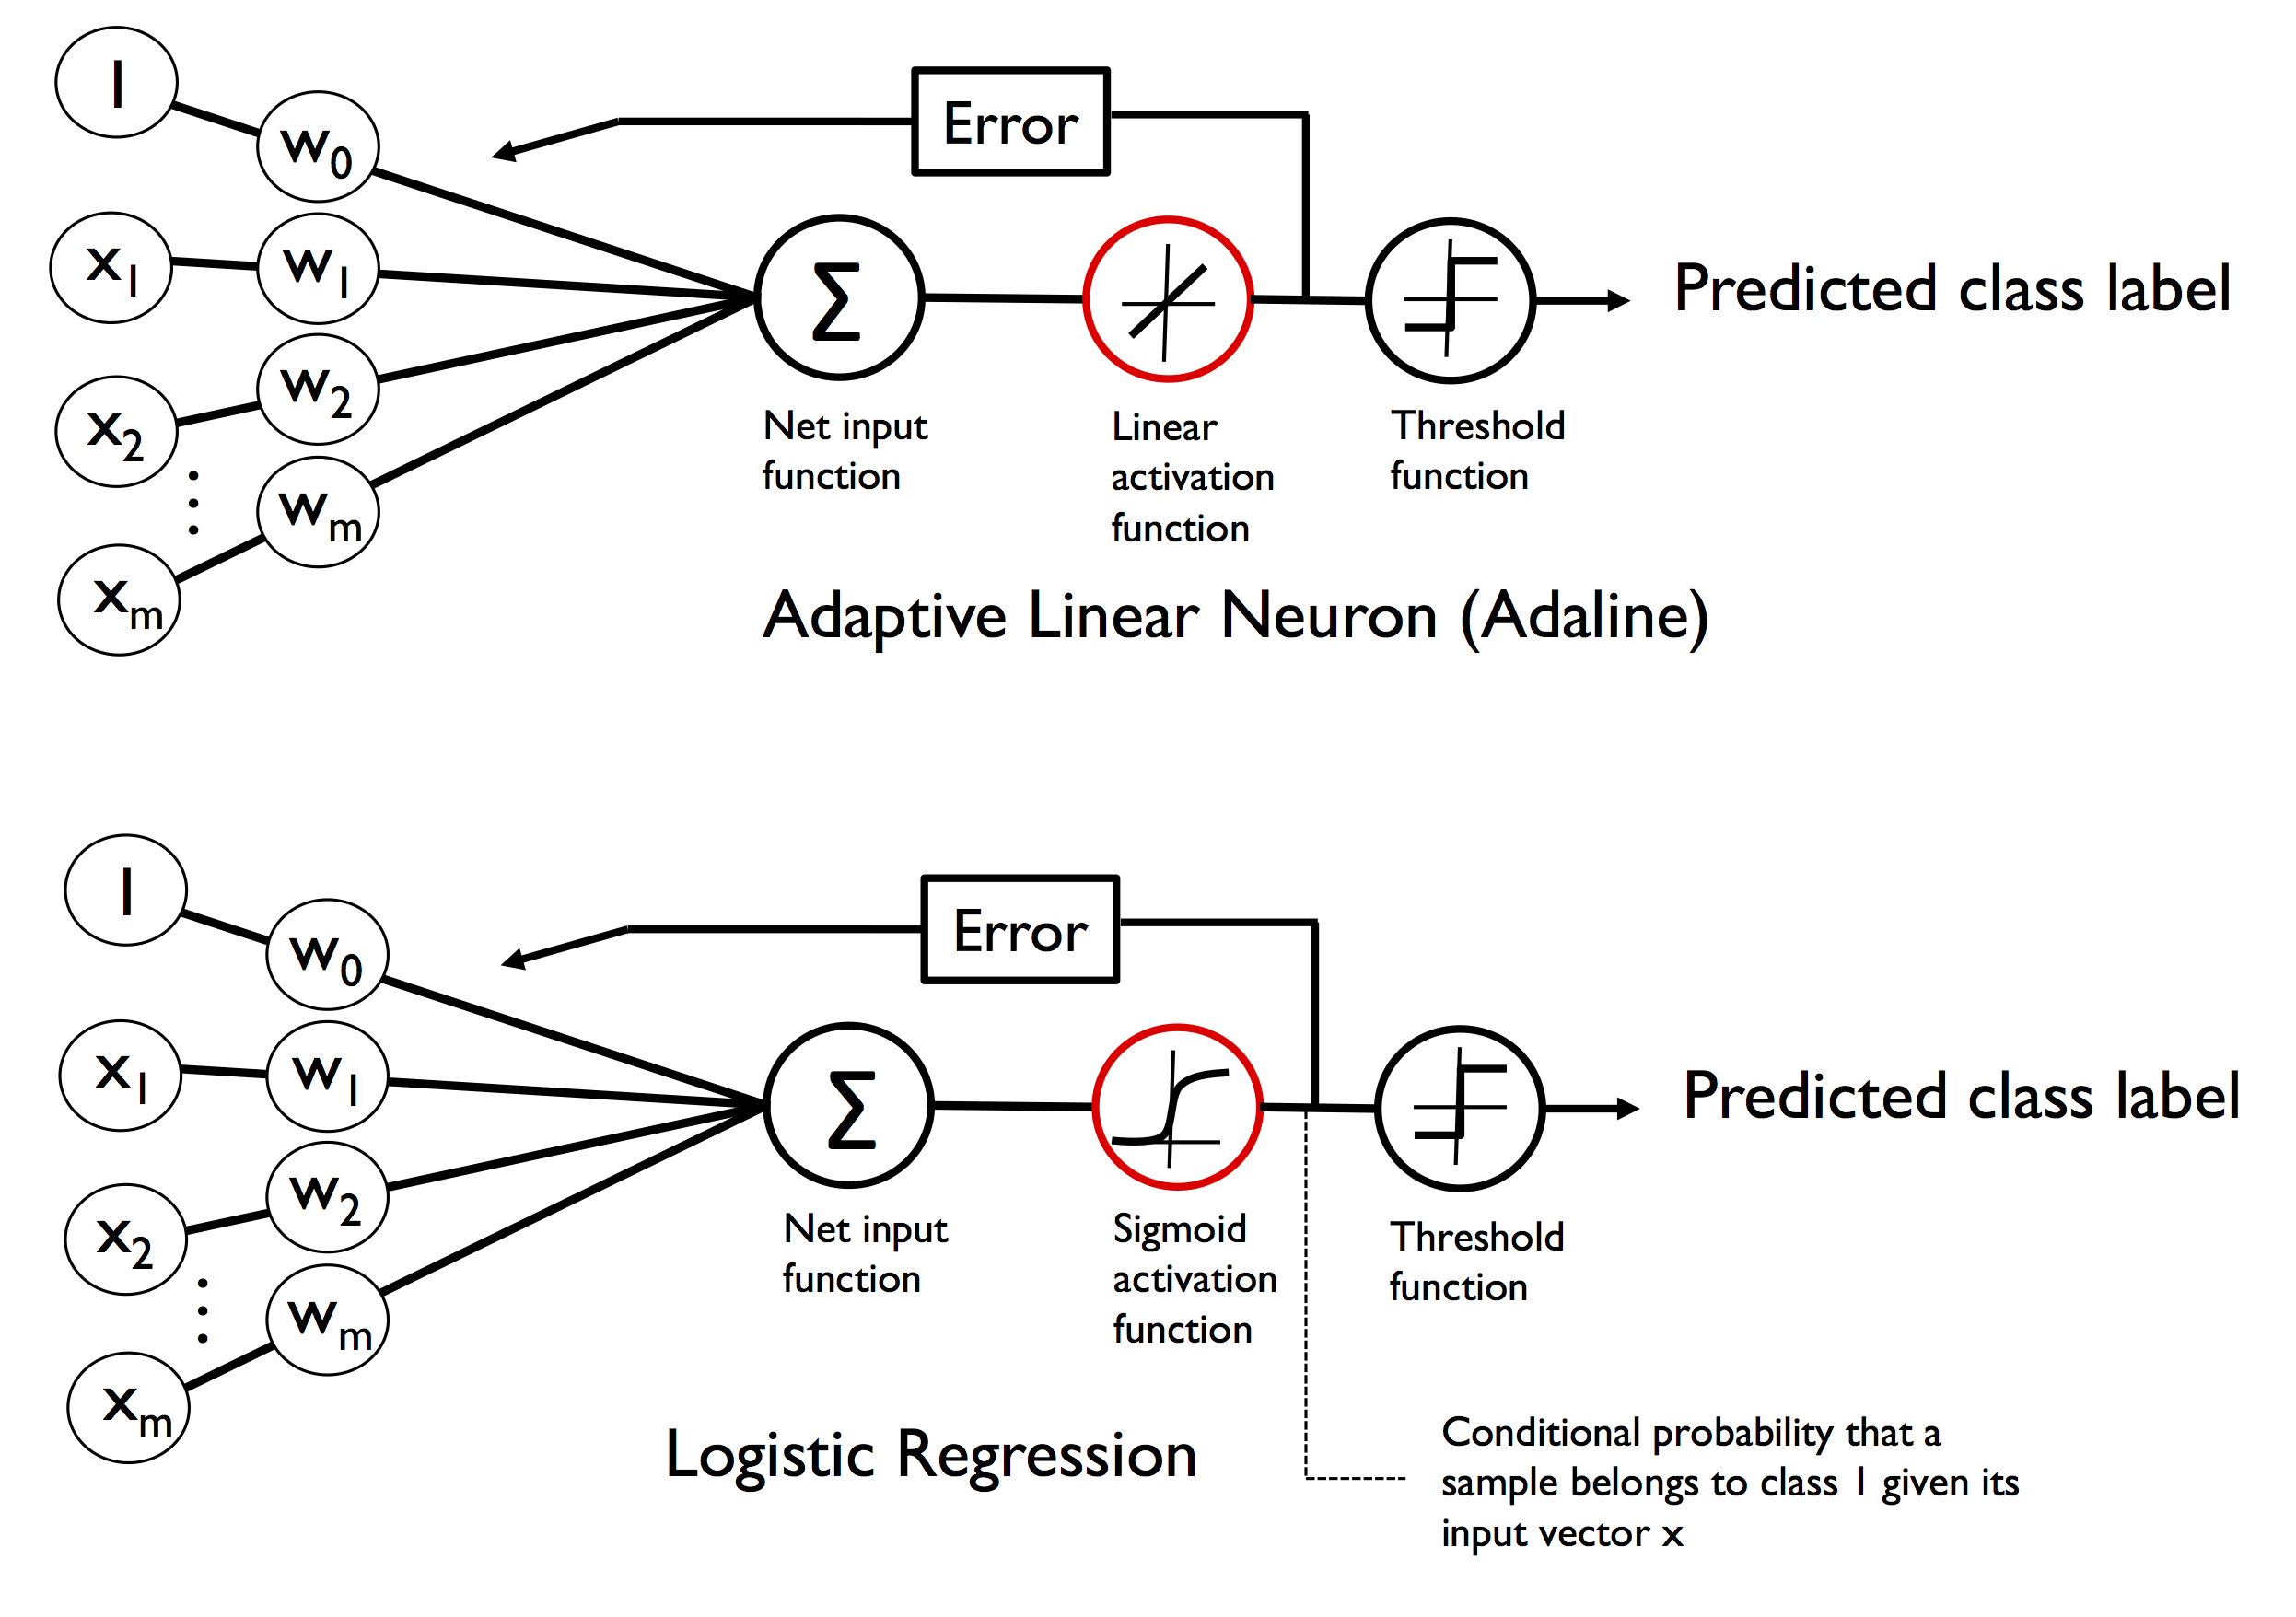

In [21]:
Image(filename='images/03_03.png', width=500) 

### Learning the weights of the logistic cost function

(0.0, 5.1)

(0, 1)

Text(0.5, 0, '$\\phi$(z)')

Text(0, 0.5, 'J(w)')

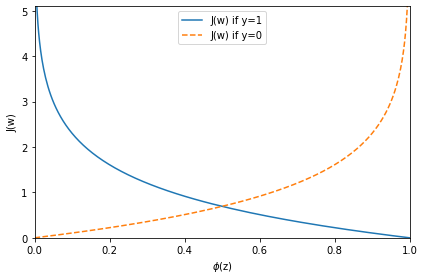

In [22]:
def cost_1(z):
    return - np.log(sigmoid(z))

def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('images/03_04.png', dpi=300)
plt.show()

## Hand-crafted logistic regression (不教，有興趣請先修過機器學習課)

In [23]:
class LogisticRegressionGD(object):
    """Logistic Regression Classifier using gradient descent.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Logistic cost function value in each epoch.

    """
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            # note that we compute the logistic `cost` now
            # instead of the sum of squared errors cost
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # equivalent to:
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

In [24]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

In [25]:
lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)

In [26]:
lrgd.fit(X_train_01_subset, y_train_01_subset)

Text(0.5, 0, 'petal length [standardized]')

Text(0, 0.5, 'petal width [standardized]')

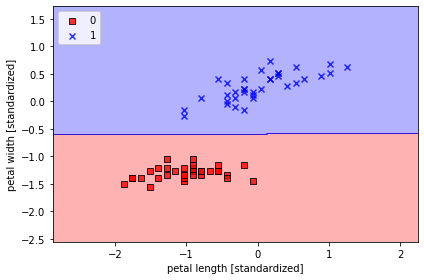

In [27]:
# Visualizing decision boundary
plot_decision_regions(X=X_train_01_subset, 
                      y=y_train_01_subset,
                      classifier=lrgd)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_05.png', dpi=300)
plt.show()

### Scikit-learn built-in logistic regression

In [28]:
from sklearn.linear_model import LogisticRegression
# sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, ...
#     intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', ...
#     verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
# C: Inverse of regularization strength
# lbfgs stands for Limited-memory BFGS
# ovr: One versus rest

In [29]:
# Training
lr.fit(X_train_std, y_train)

LogisticRegression(C=100.0, multi_class='ovr', random_state=1)

Text(0.5, 0, 'petal length [standardized]')

Text(0, 0.5, 'petal width [standardized]')

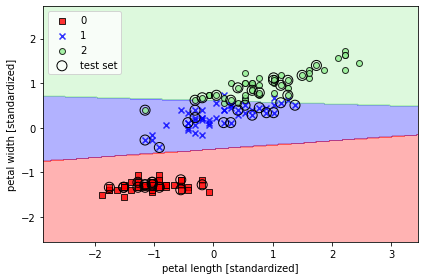

In [30]:
# Visualize decision boundary
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(len(y_train), len(y_train)+len(y_test)))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_06.png', dpi=300)
plt.show()

In [31]:
# Testing
lr.predict_proba(X_test_std[:4, :])

array([[2.05714020e-07, 3.65883810e-01, 6.34115984e-01],
       [9.14334292e-01, 8.56657084e-02, 5.11580930e-12],
       [7.78951929e-01, 2.21048071e-01, 1.16817838e-12],
       [9.42503932e-05, 8.16677639e-01, 1.83228111e-01]])

In [32]:
lr.predict_proba(X_test_std[:4, :]).sum(axis=1)

array([1., 1., 1., 1.])

In [33]:
lr.predict_proba(X_test_std[:4, :]).argmax(axis=1)

array([2, 0, 0, 1], dtype=int64)

In [34]:
lr.predict(X_test_std[:4, :])

array([2, 0, 0, 1])

### Tackling overfitting via regularization

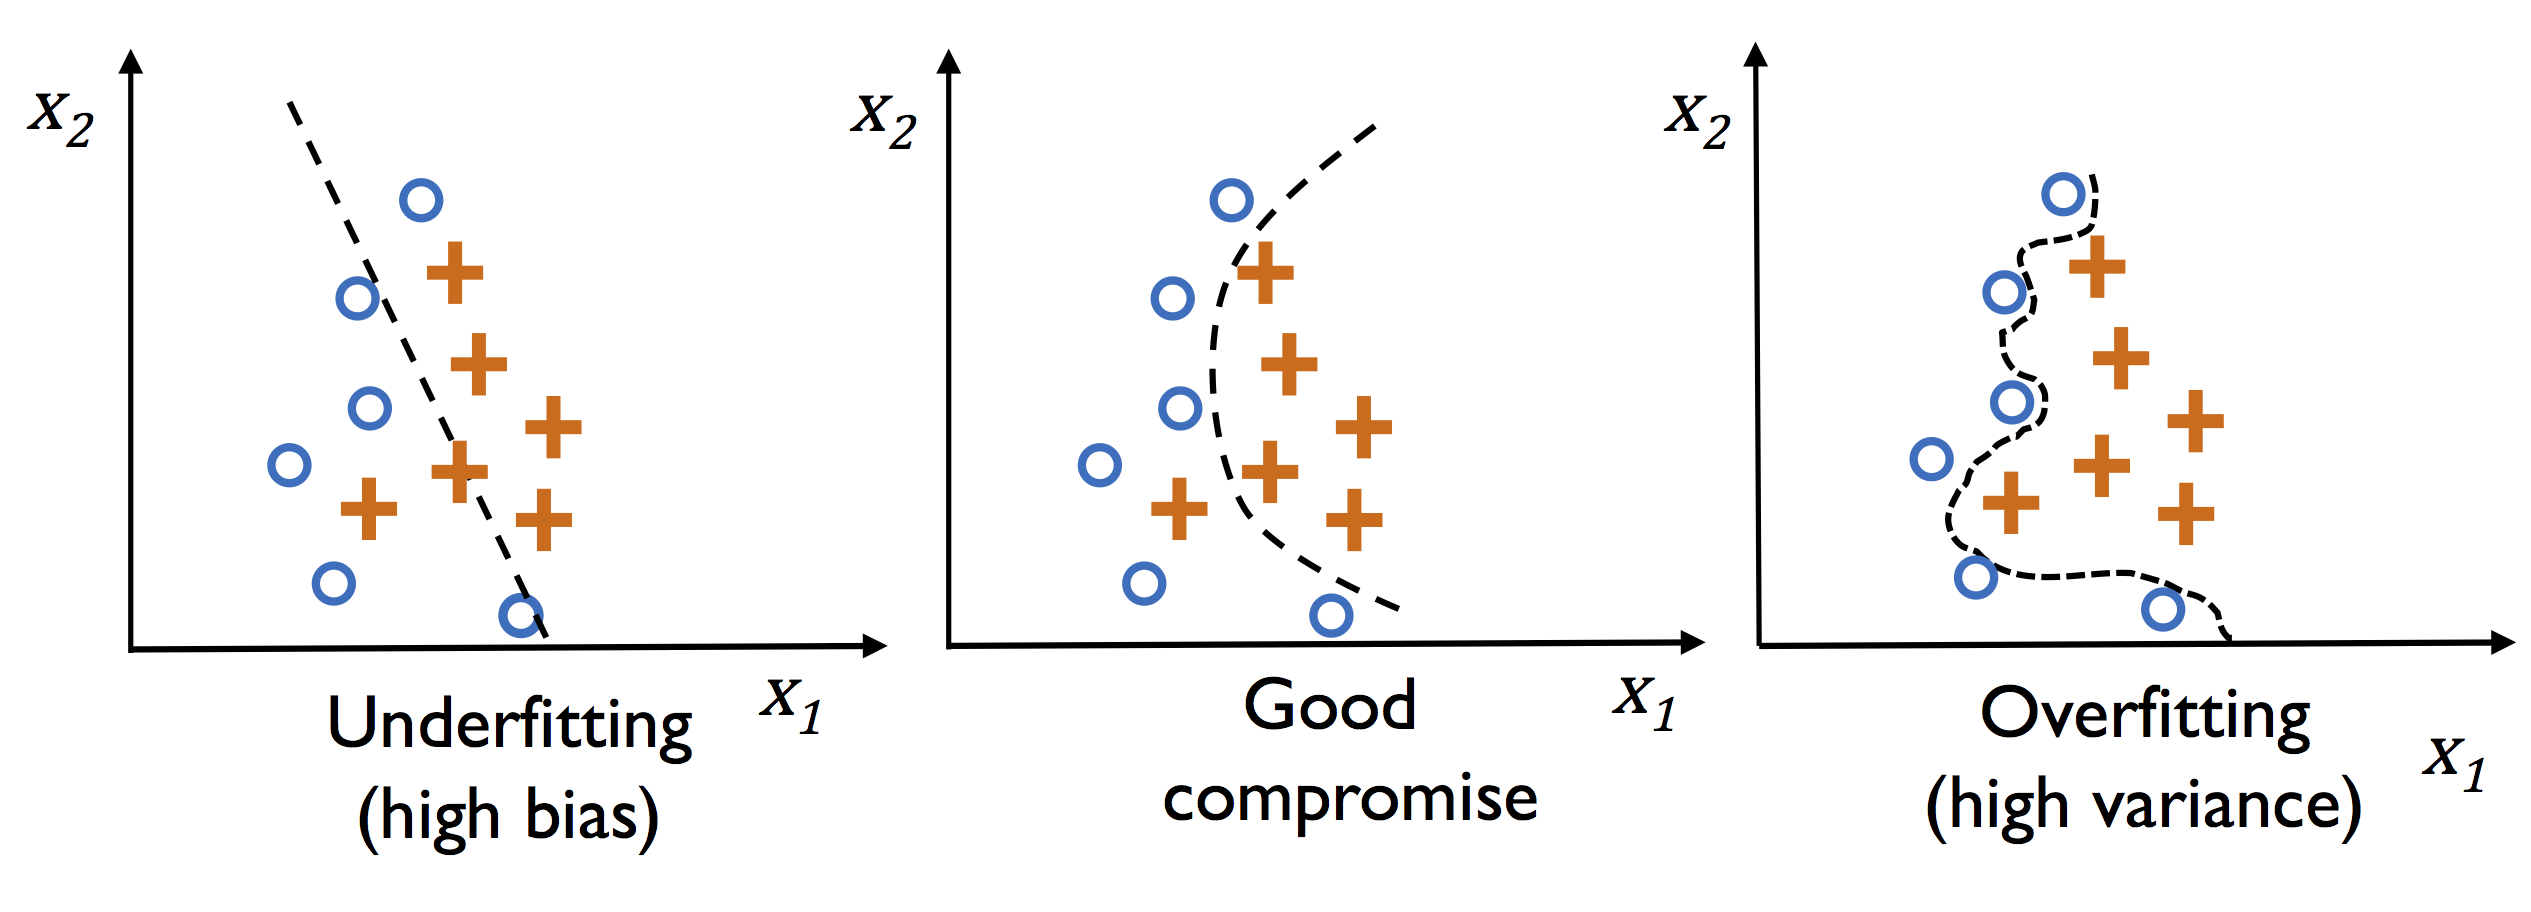

In [35]:
Image(filename='images/03_07.png', width=700) 

LogisticRegression(C=1e-05, multi_class='ovr', random_state=1)

LogisticRegression(C=0.0001, multi_class='ovr', random_state=1)

LogisticRegression(C=0.001, multi_class='ovr', random_state=1)

LogisticRegression(C=0.01, multi_class='ovr', random_state=1)

LogisticRegression(C=0.1, multi_class='ovr', random_state=1)

LogisticRegression(multi_class='ovr', random_state=1)

LogisticRegression(C=10.0, multi_class='ovr', random_state=1)

LogisticRegression(C=100.0, multi_class='ovr', random_state=1)

LogisticRegression(C=1000.0, multi_class='ovr', random_state=1)

LogisticRegression(C=10000.0, multi_class='ovr', random_state=1)

Text(0, 0.5, 'weight coefficient')

Text(0.5, 0, 'C')

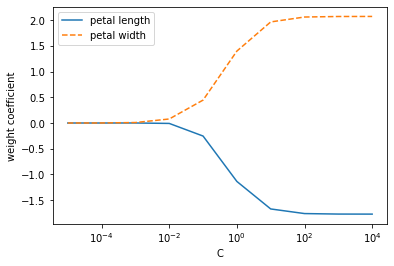

In [36]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1, solver='lbfgs', multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
#plt.savefig('images/03_08.png', dpi=300)
plt.show()

# Maximum margin classification with support vector machines

## Maximum margin intuition

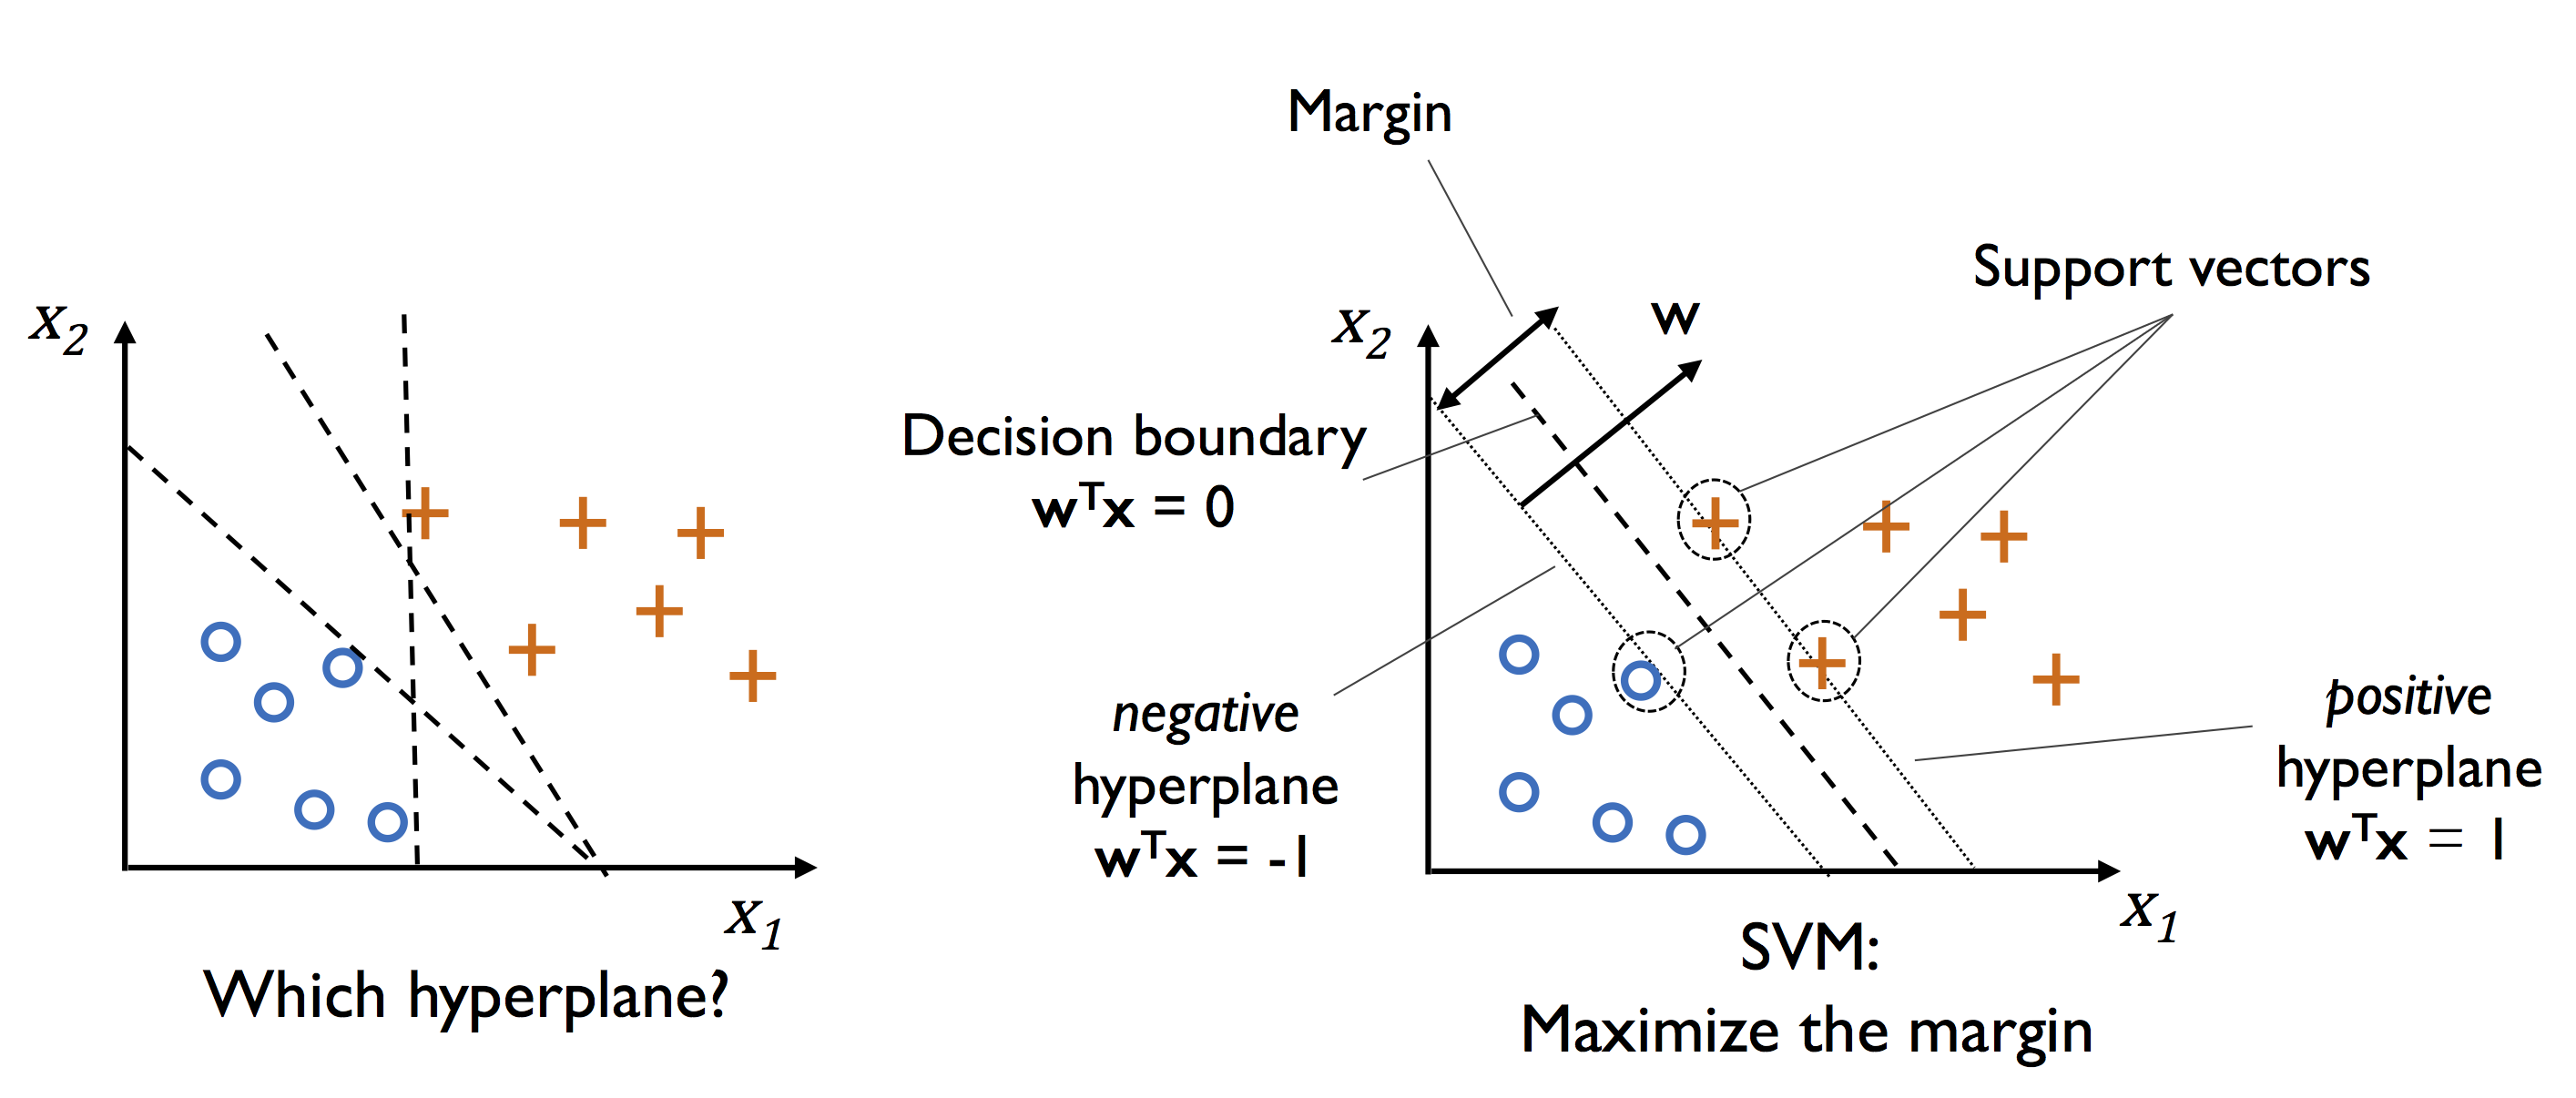

In [37]:
Image(filename='images/03_09.png', width=700) 

## Dealing with the nonlinearly separable case using slack variables

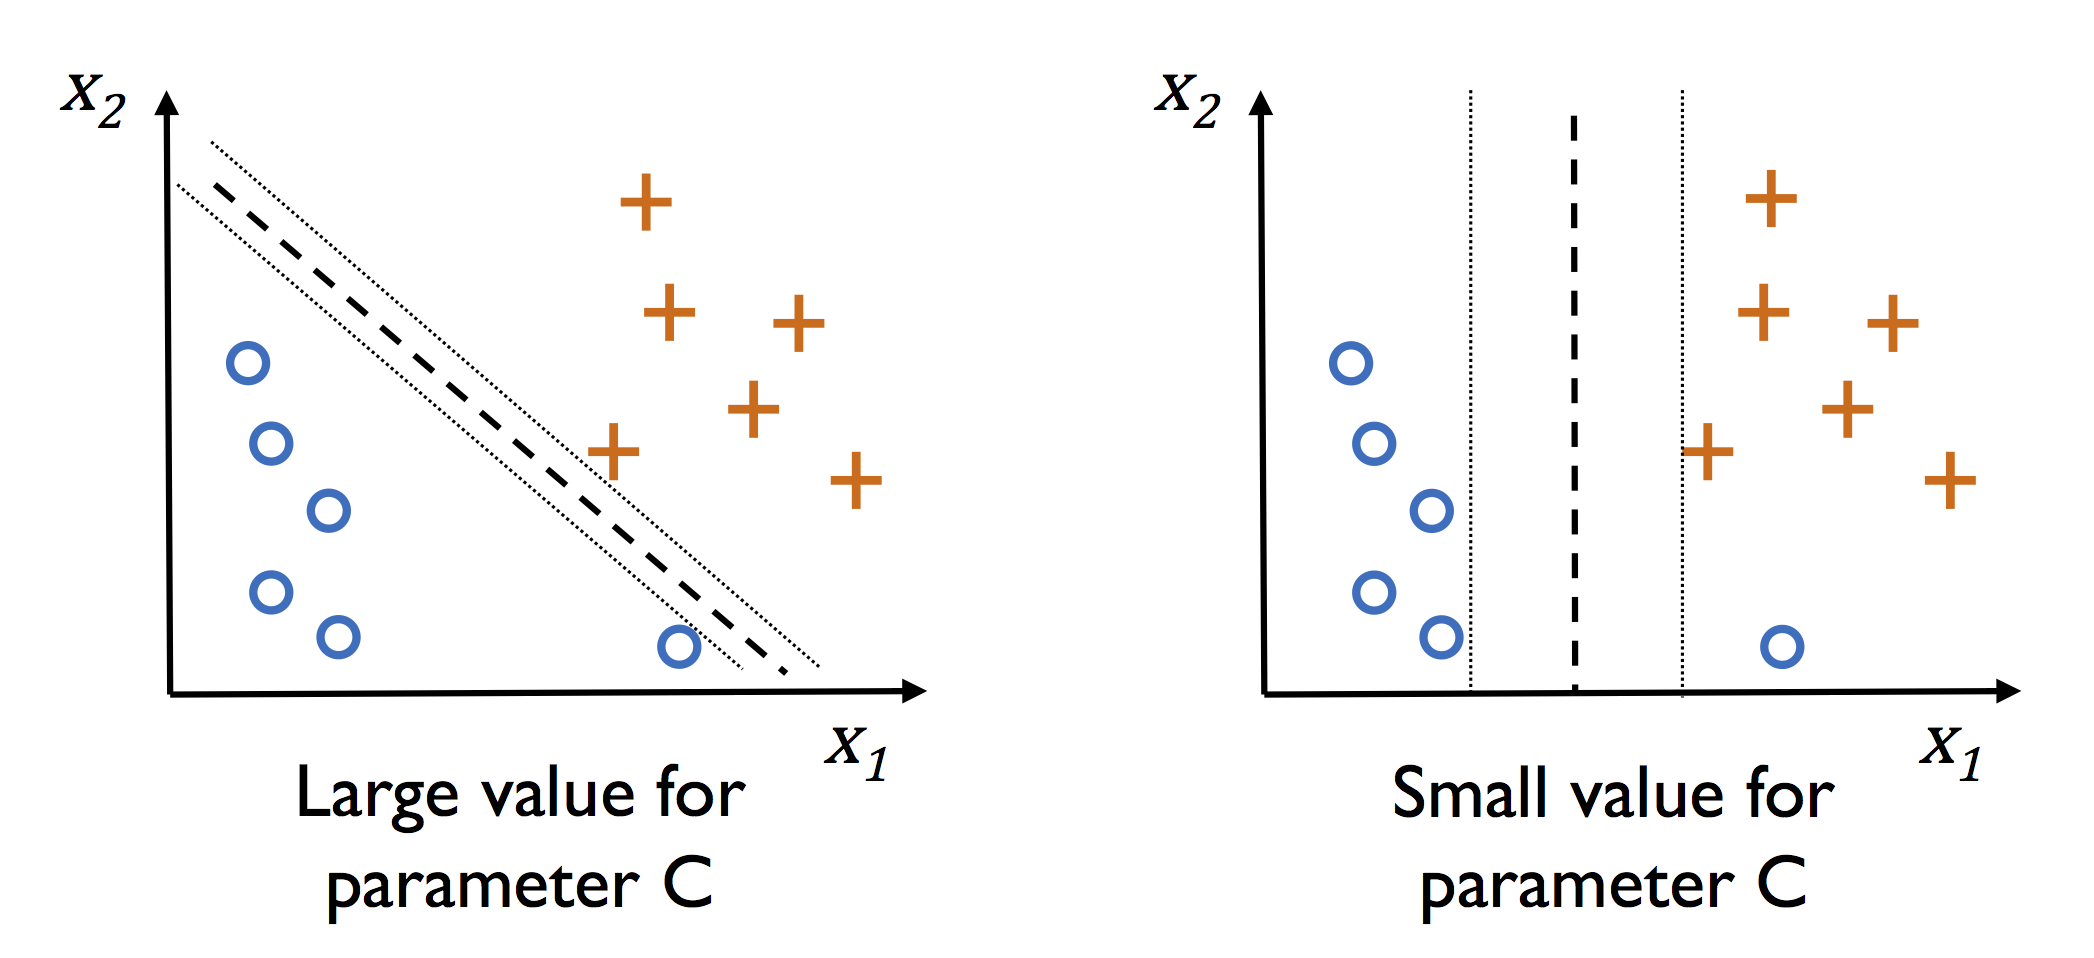

In [38]:
Image(filename='images/03_10.png', width=600) 

In [39]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)

In [40]:
# Training
svm.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=1)

Text(0.5, 0, 'petal length [standardized]')

Text(0, 0.5, 'petal width [standardized]')

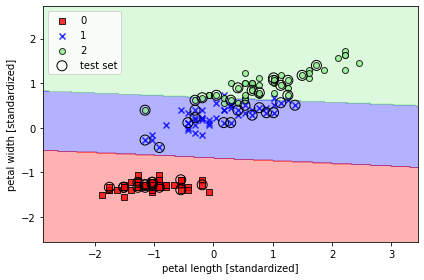

In [41]:
# Visualize decision boundary
plot_decision_regions(X_combined_std, y_combined, classifier=svm, 
                      test_idx=range(len(y_train), len(y_train)+len(y_test)))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_11.png', dpi=300)
plt.show()

### <span style="color:red">Exercise 1: Wine Classification
See W09 sklearn_exercise.

# Solving non-linear problems using kernel SVM

## The XOR dataset

In [42]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

(-3, 3)

(-3, 3)

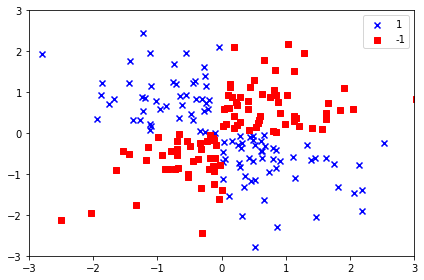

In [43]:
plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('images/03_12.png', dpi=300)
plt.show()

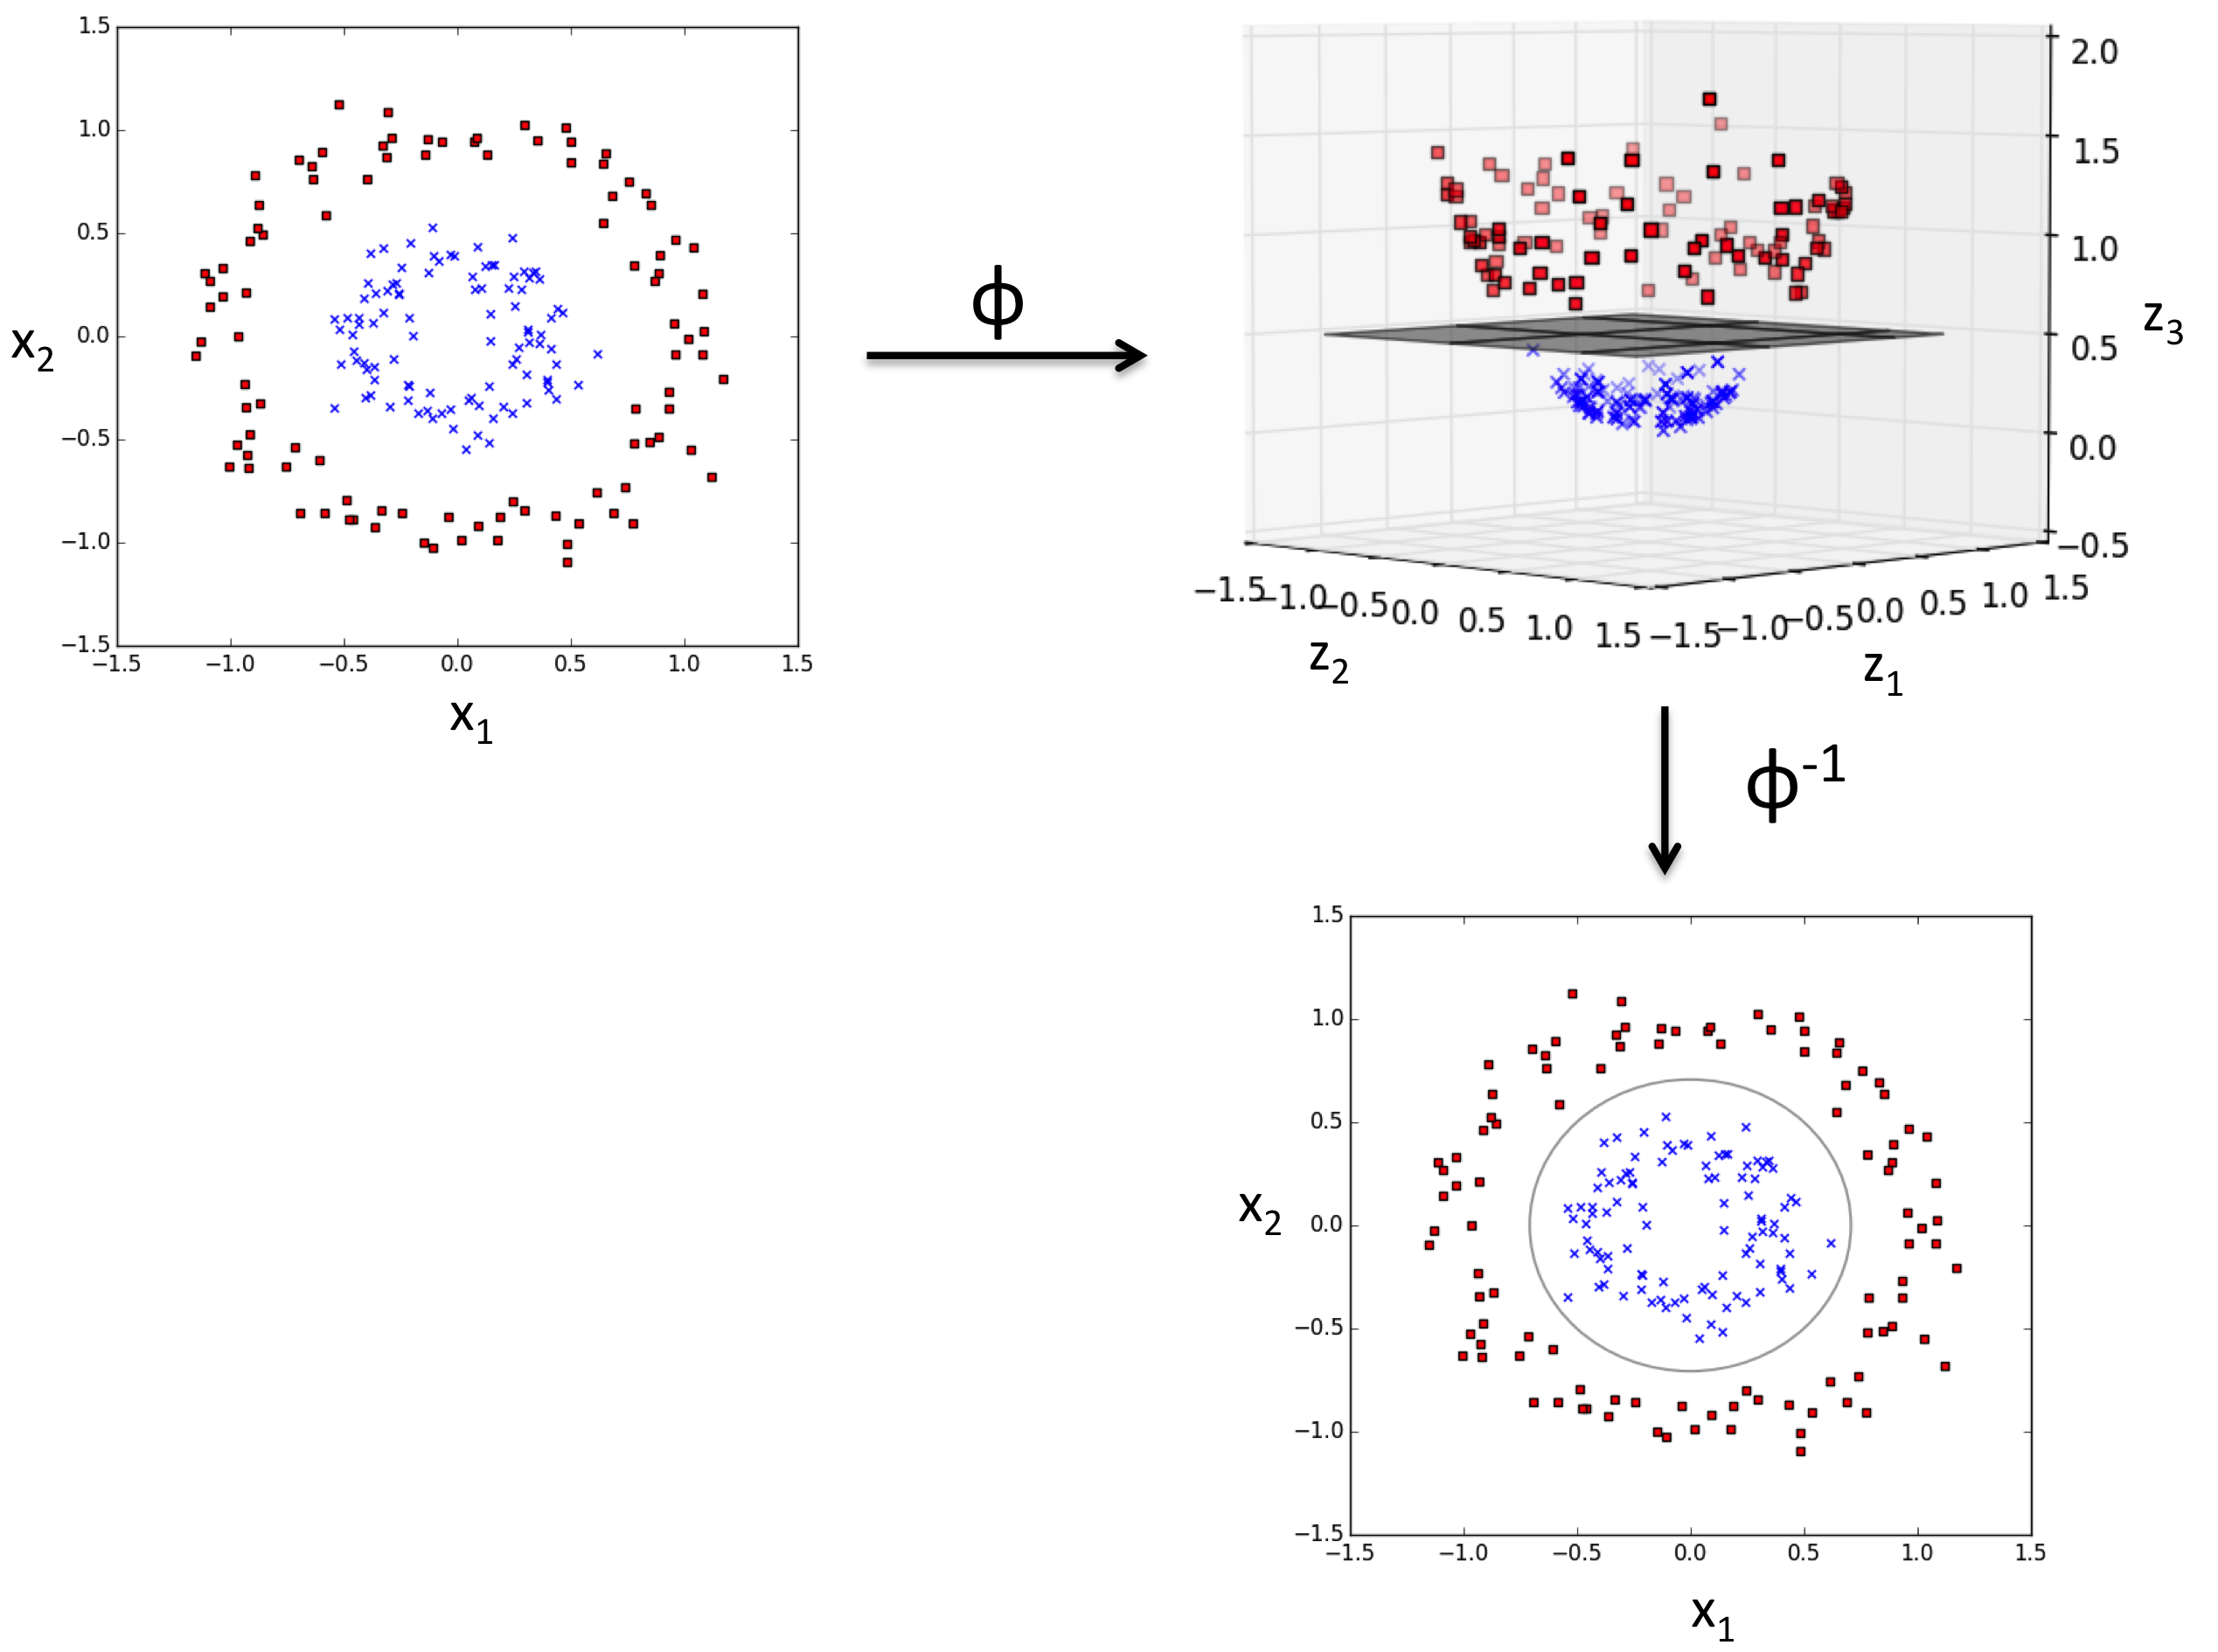

In [44]:
Image(filename='images/03_13.png', width=700) 

In [45]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)

In [46]:
# Training
svm.fit(X_xor, y_xor)

SVC(C=10.0, gamma=0.1, random_state=1)

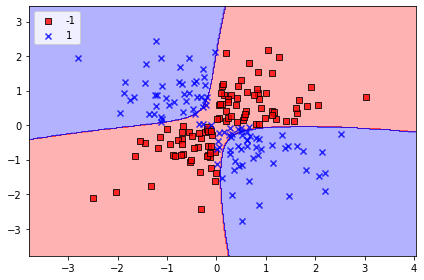

In [47]:
# Visualize the decision boundary
plot_decision_regions(X_xor, y_xor, classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_14.png', dpi=300)
plt.show()

### <span style="color:red">Exercise 2: Parameter tuning for SVC
See W09 sklearn_exercise.

# Decision tree learning

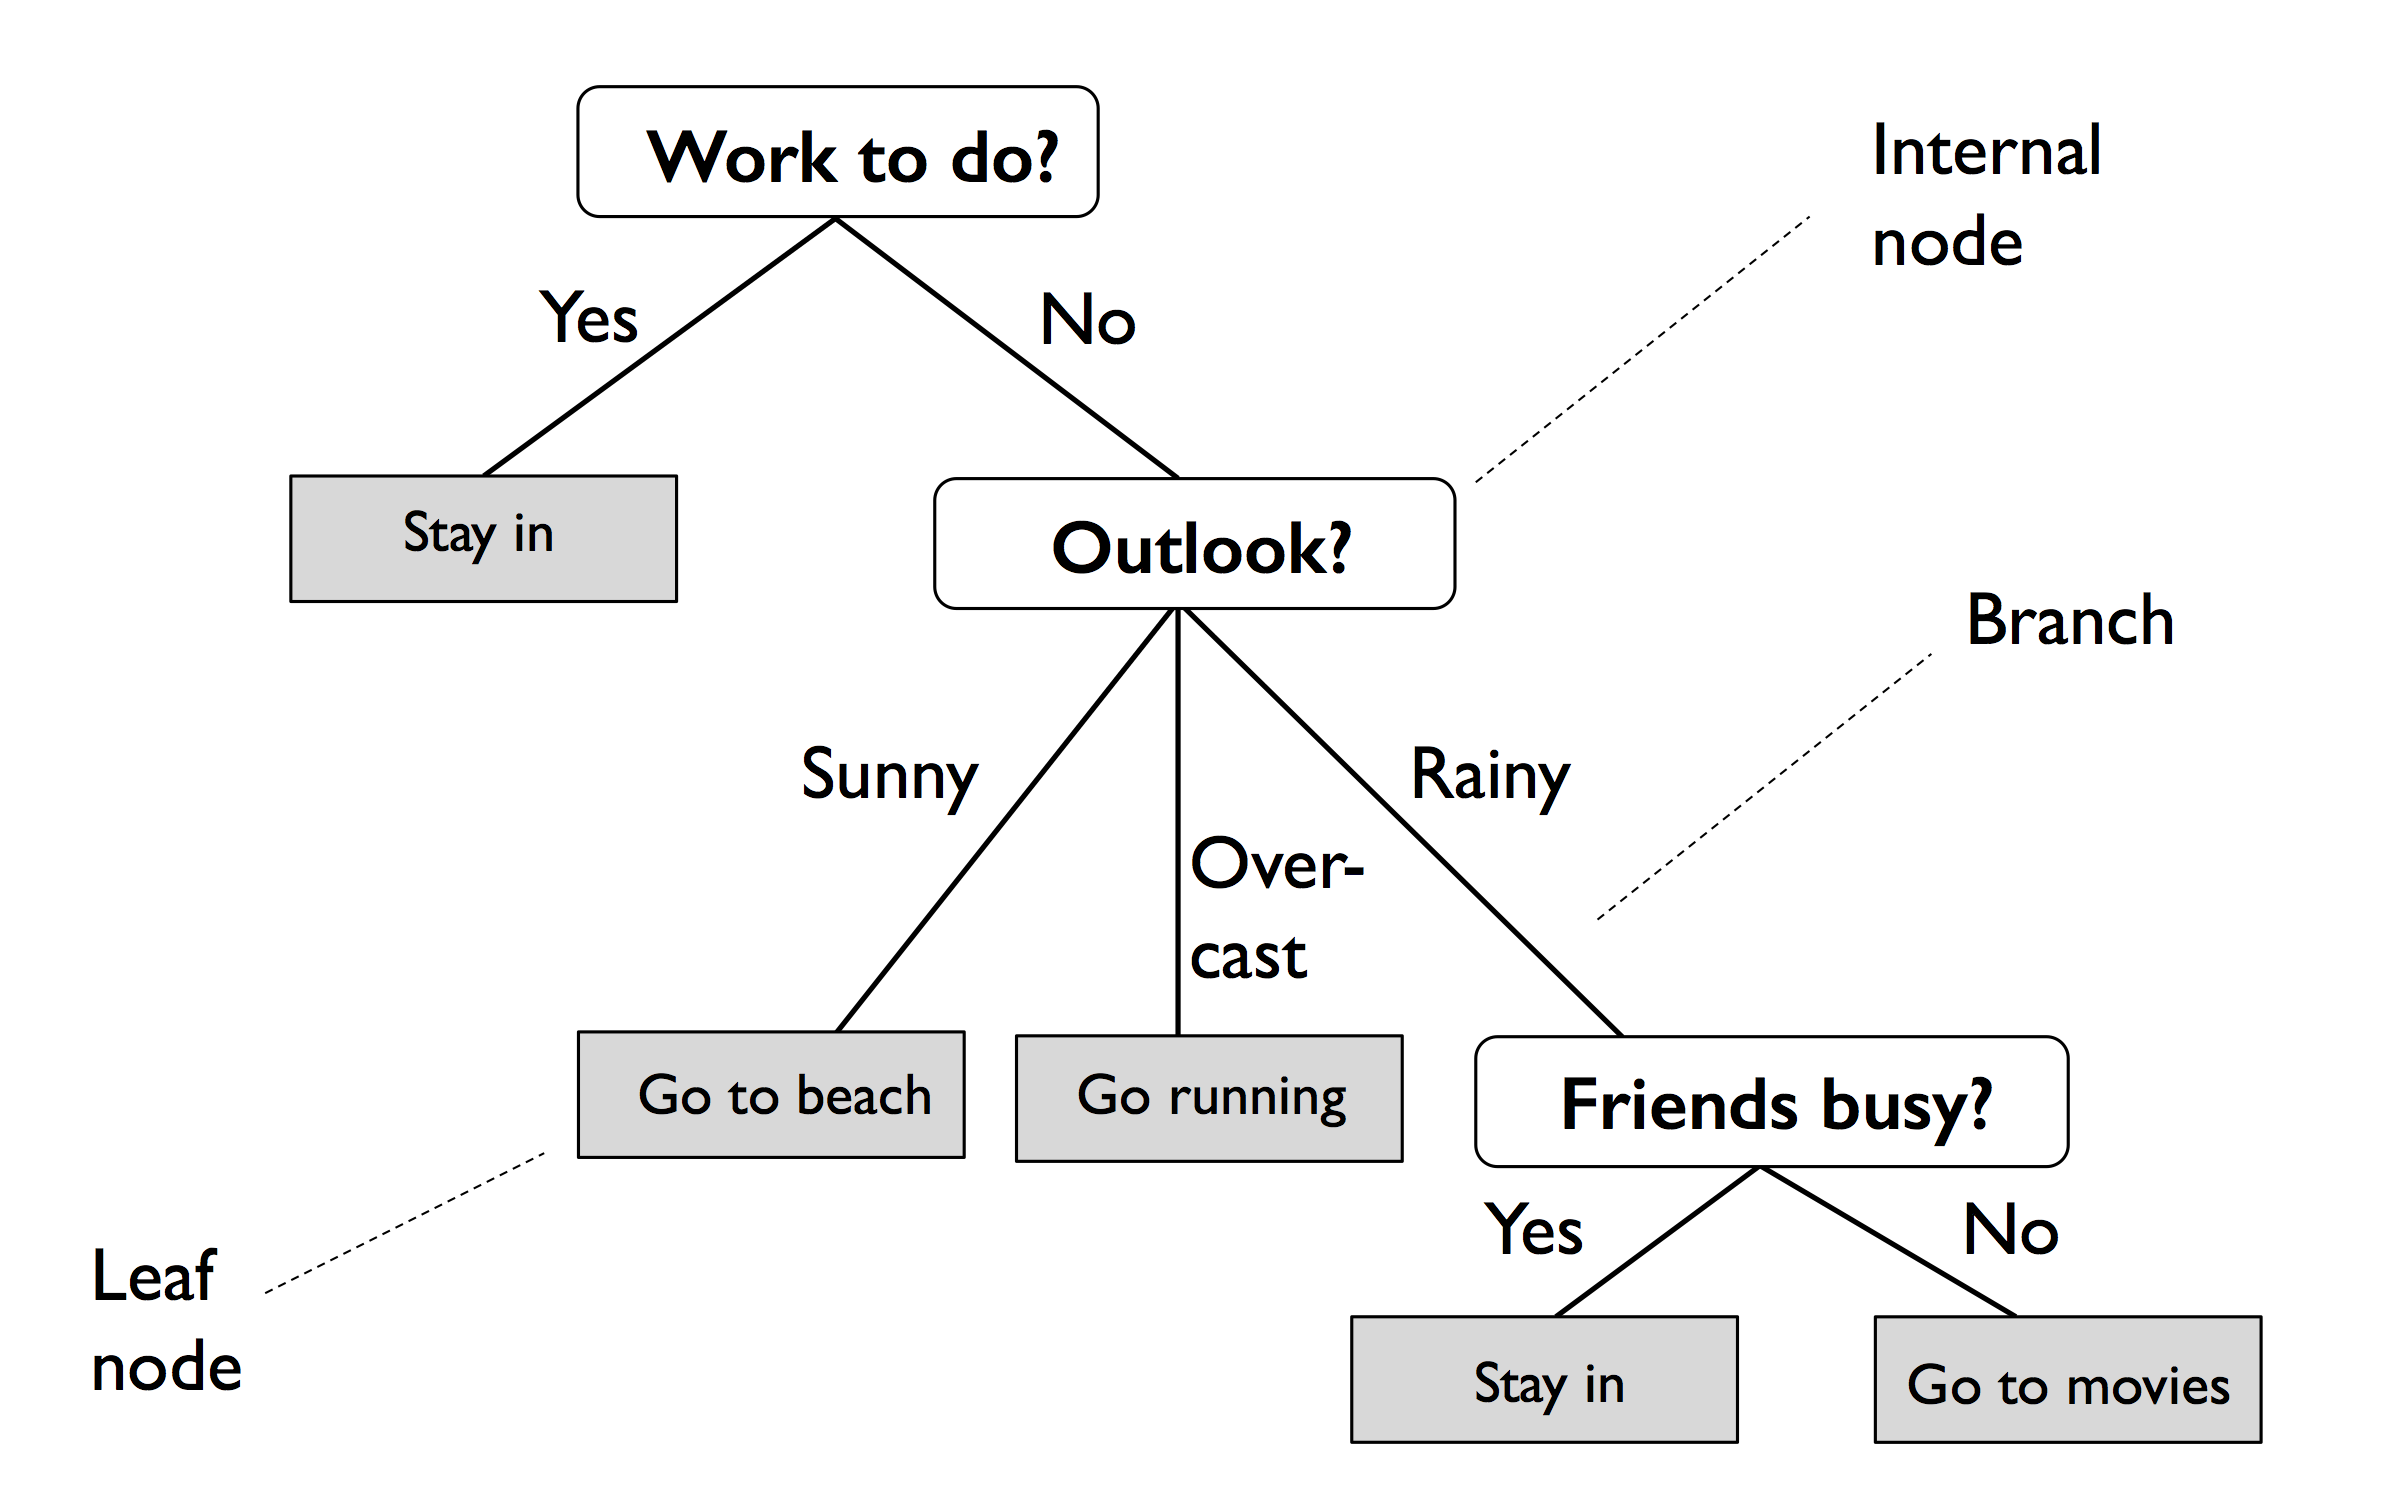

In [48]:
Image(filename='images/03_17.png', width=500) 

## Measure the impurity

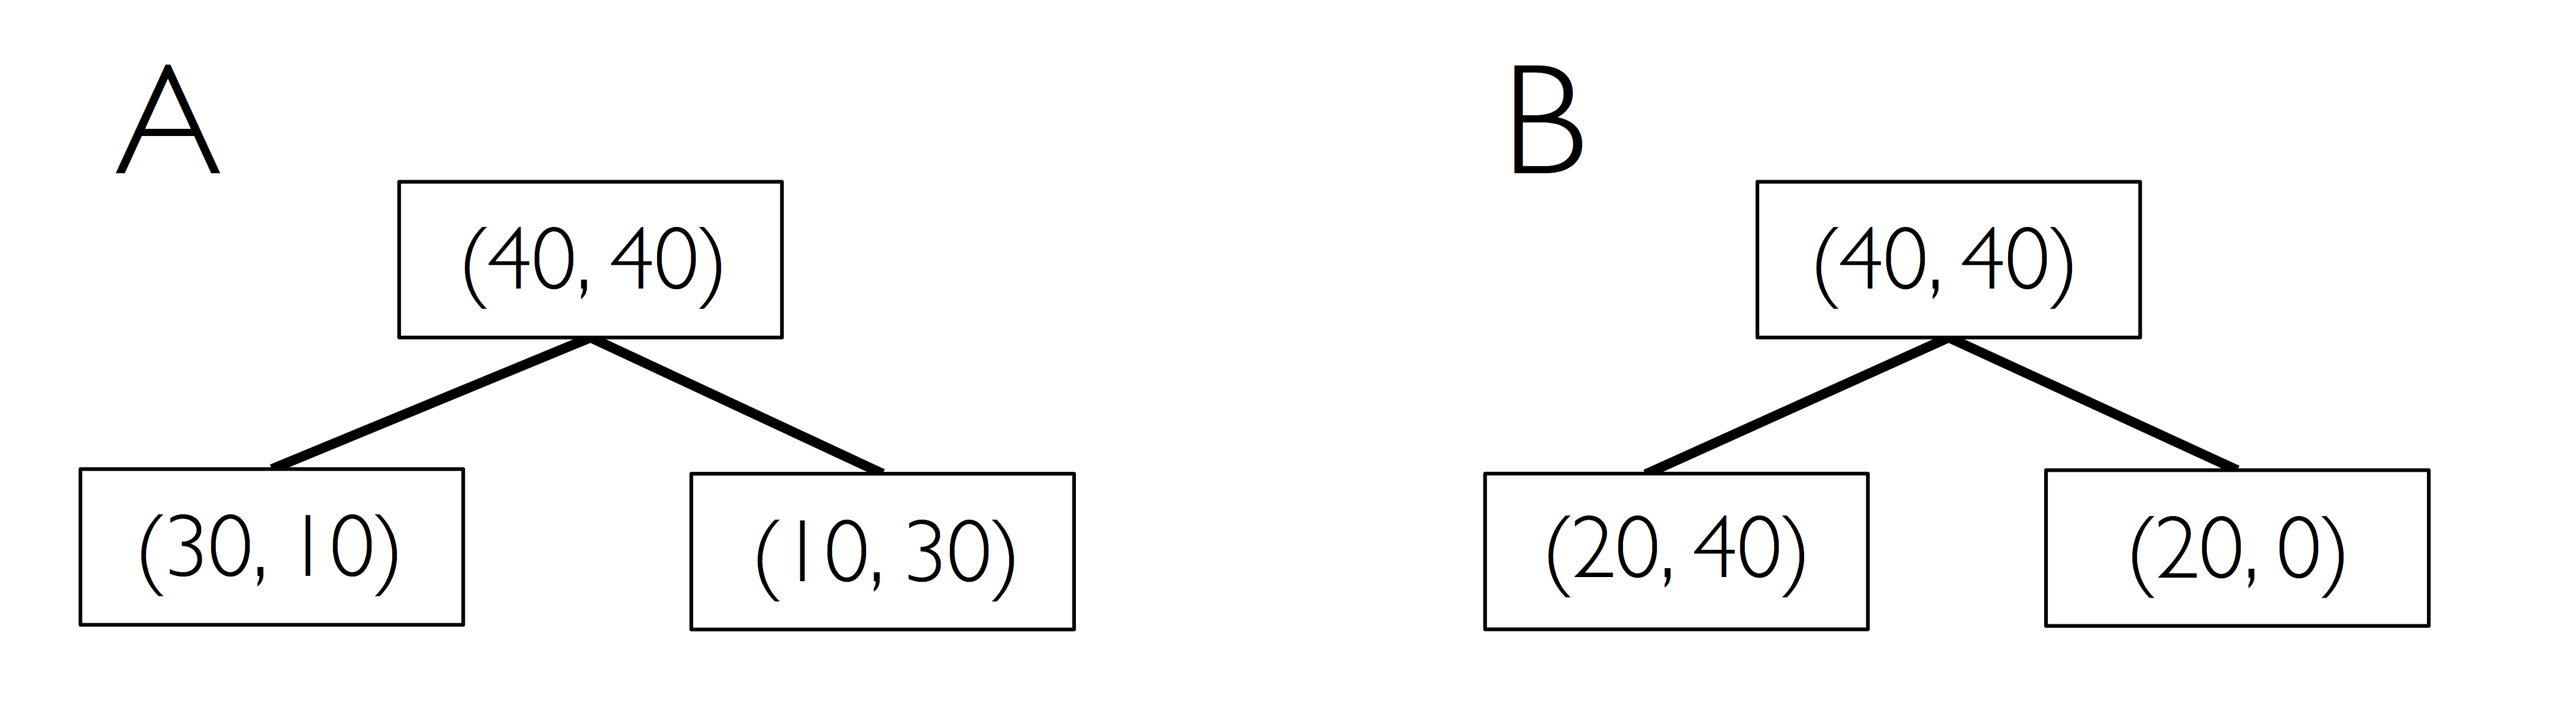

In [49]:
Image(filename='images/03_18.png', width=500) 

In [50]:
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))

def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))

def error(p):
    return 1 - np.max([p, 1 - p])

In [51]:
x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

(0, 1.1)

Text(0.5, 0, 'p')

Text(0, 0.5, 'impurity index')

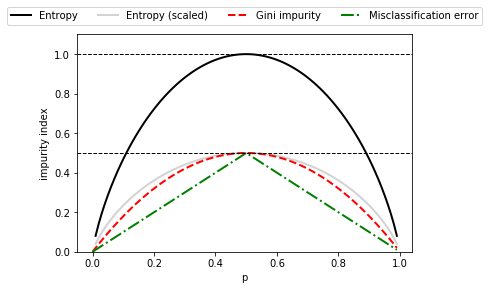

In [52]:
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy (scaled)', 
                           'Gini impurity', 'Misclassification error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p')
plt.ylabel('impurity index')
#plt.savefig('images/03_19.png', dpi=300, bbox_inches='tight')
plt.show()

## Building a decision tree

In [53]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)

In [54]:
# Training
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

Text(0.5, 0, 'petal length [cm]')

Text(0, 0.5, 'petal width [cm]')

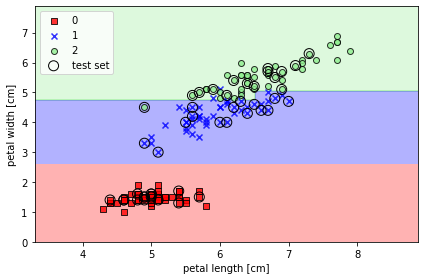

In [55]:
# Visualize decision boundary
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree_model,
                      test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_20.png', dpi=300)
plt.show()

## Visualize a decision tree

[Text(83.7, 195.696, 'X[1] <= 2.6\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]'),
 Text(41.85, 152.208, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(125.55000000000001, 152.208, 'X[1] <= 4.75\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]'),
 Text(83.7, 108.72, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(167.4, 108.72, 'X[1] <= 5.05\ngini = 0.219\nsamples = 40\nvalue = [0, 5, 35]'),
 Text(83.7, 65.232, 'X[0] <= 6.5\ngini = 0.494\nsamples = 9\nvalue = [0, 4, 5]'),
 Text(41.85, 21.744, 'gini = 0.408\nsamples = 7\nvalue = [0, 2, 5]'),
 Text(125.55000000000001, 21.744, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(251.10000000000002, 65.232, 'X[0] <= 6.05\ngini = 0.062\nsamples = 31\nvalue = [0, 1, 30]'),
 Text(209.25, 21.744, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(292.95, 21.744, 'gini = 0.0\nsamples = 27\nvalue = [0, 0, 27]')]

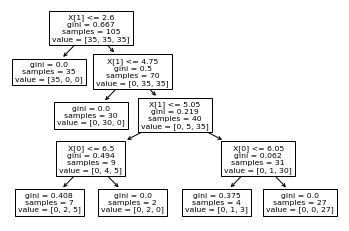

In [56]:
from sklearn import tree

tree.plot_tree(tree_model)  # Requires sklearn version >= 0.21
# Update sklearn in Anaconda prompt (with administrator status): conda upgrade scikit-learn
#plt.savefig('images/03_21_1.pdf')
plt.show()

In [57]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

# Anaconda prompt (with administrator status): conda install graphviz
# Anaconda prompt (with administrator status): conda install -c conda-forge pydotplus

dot_data = export_graphviz(tree_model, filled=True, rounded=True,
                           class_names=['Setosa', 'Versicolor', 'Virginica'],
                           feature_names=['petal length', 'petal width'], out_file=None) 
graph = graph_from_dot_data(dot_data) 
graph.write_png('tree.png')

True

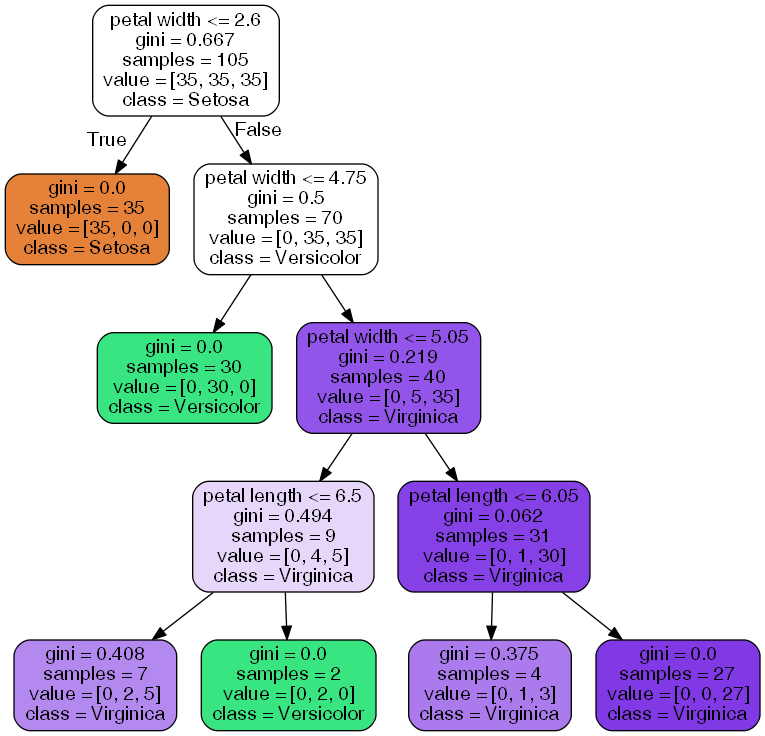

In [58]:
Image(filename='tree.png', width=600) 

## Random forest
Idea: Combining many decision trees

In [59]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=2)

In [60]:
# Training
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=25, n_jobs=2, random_state=1)

Text(0.5, 0, 'petal length [cm]')

Text(0, 0.5, 'petal width [cm]')

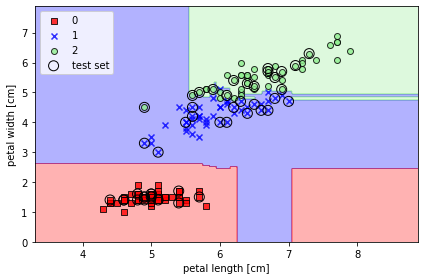

In [61]:
# Visualize decision boundary
plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_22.png', dpi=300)
plt.show()

# K-nearest neighbors - a lazy learning algorithm

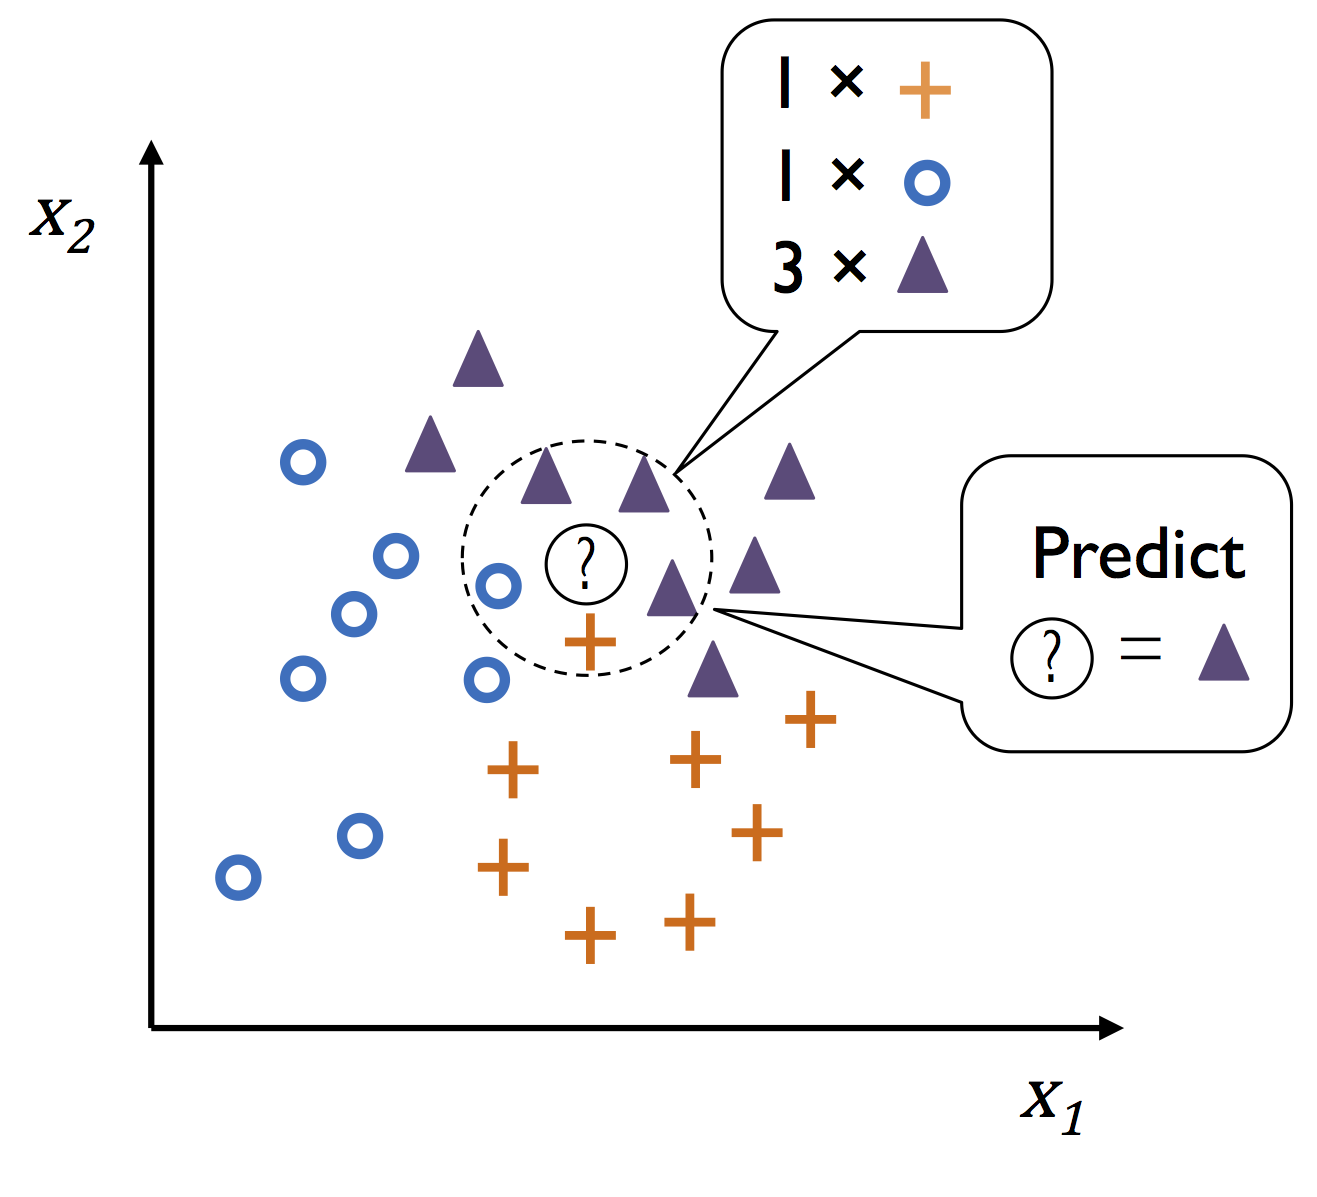

In [62]:
Image(filename='images/03_23.png', width=400) 

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')

In [64]:
# Training
knn.fit(X_train_std, y_train)

KNeighborsClassifier()

Text(0.5, 0, 'petal length [standardized]')

Text(0, 0.5, 'petal width [standardized]')

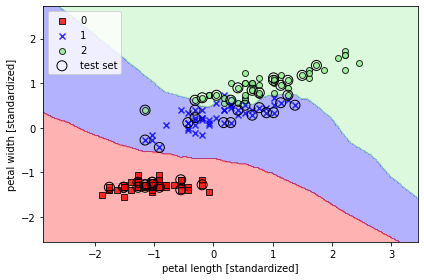

In [65]:
# Visualize decision boundary
plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_24.png', dpi=300)
plt.show()